# <center> Music Recommendation 
# <center> EDA Part I


## Description of the project:
- Predict whether a piece of music will be more or less appreciated based on Twitter analyzes and feedback.
- We can also use the Spotify dataset to try and analyze music genres.

## Data

The dataset that we will be using will come from several different places; three datasets will come from Twitter and display 11.6 million music listening events of 139K users and 346K tracks. Another dataset will come from Spotify and will cover 125 different genres. Information from these datsets will include both user information such as which users listened to which tracks but also information related to similarity metrics such as danceability and loudness.

In [1]:
#import the standard libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Call the databases

In [2]:
#creating dataframes from CSVs regarding information from Twitter
#we will display statistical information for all the quantitative variables that we pull to gain a holistic understanding of the datasets
#we will also display information related to the null variables in each column

#only pulling columns 0 to 22 for cont_df as the remaining columns need more investigation
cont_df = pd.read_csv('context_content_features.csv', usecols=range(0, 22))
sent_df = pd.read_csv('sentiment_values.csv', index_col = False)
utht_df = pd.read_csv('user_track_hashtag_timestamp.csv')

C:\Users\fbmd1067\AppData\Local\Temp\ipykernel_2096\3782684915.py:7: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  sent_df = pd.read_csv('sentiment_values.csv', index_col = False)


## **_sent_df has four columns without name. The data of these columns can't be used!_**

## Dataframe shapes

In [3]:
#Print the dataframe of the databases

print('cont_df shape:', cont_df.shape) #(11614671, 22)
print('sent_df shape:', sent_df.shape) #(5290, 17)
print('utht_df shape:', utht_df.shape) #(17560113, 4)

cont_df shape: (11614671, 22)
sent_df shape: (5290, 17)
utht_df shape: (17560113, 4)


# Database No. 1: Context_content_features (cont_df)
## Database exploration

In [4]:
#Databese display

cont_df.head(3)

coordinates  instrumentalness  liveness  speechiness  danceability  valence  \
0         NaN           0.00479    0.1800       0.0294         0.634    0.342   
1         NaN           0.01770    0.0638       0.0624         0.769    0.752   
2         NaN           0.00000    0.0860       0.0436         0.675    0.775   

   loudness    tempo  acousticness  energy  ...  \
0    -8.345  125.044       0.00035   0.697  ...   
1    -8.252   95.862       0.26700   0.826  ...   
2    -4.432   97.030       0.21700   0.885  ...   

                          artist_id  place  geo tweet_lang  \
0  b2980c722a1ace7a30303718ce5491d8    NaN  NaN         en   
1  5cddcd0e314e2f2223ab21937d2c8778    NaN  NaN         en   
2  e41273f43af504714d85465294f1f369    NaN  NaN         en   

                           track_id           created_at lang  \
0  cd52b3e5b51da29e5893dba82a418a4b  2014-01-01 05:54:21   en   
1  da3110a77b724072b08f231c9d6f7534  2014-01-01 05:54:22   en   
2  ba84d88c10fb0e42d4754a27ead10546  2014-01-01 05:54:22   es   

                     time_zone       user_id                  id  
0   Central Time (US & Canada)  8.149694e+07  418243774842929150  
1                          NaN  2.205687e+09  418243779137896450  
2  Mountain Time (US & Canada)  1.325884e+08  418243779951198200  

[3 rows x 22 columns]

In [5]:
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11614671 entries, 0 to 11614670
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   coordinates       object 
 1   instrumentalness  float64
 2   liveness          float64
 3   speechiness       float64
 4   danceability      float64
 5   valence           float64
 6   loudness          float64
 7   tempo             float64
 8   acousticness      float64
 9   energy            float64
 10  mode              float64
 11  key               float64
 12  artist_id         object 
 13  place             object 
 14  geo               object 
 15  tweet_lang        object 
 16  track_id          object 
 17  created_at        object 
 18  lang              object 
 19  time_zone         object 
 20  user_id           float64
 21  id                int64  
dtypes: float64(12), int64(1), object(9)
memory usage: 1.9+ GB


## cont_df: statistical description numerical values

In [6]:
cont_df.describe().T

count          mean           std          min  \
instrumentalness  11611869.0  9.644051e-02  2.386454e-01      0.00000   
liveness          11611757.0  1.914839e-01  1.597695e-01      0.00673   
speechiness       11610783.0  6.556934e-02  6.499443e-02      0.02160   
danceability      11610783.0  5.579694e-01  1.580563e-01      0.03710   
valence           11609883.0  5.165480e-01  2.478292e-01      0.00001   
loudness          11614671.0 -7.687357e+00  3.846243e+00    -60.00000   
tempo             11614671.0  1.228318e+02  2.830076e+01      0.00000   
acousticness      11611884.0  2.085219e-01  2.690199e-01      0.00000   
energy            11611910.0  6.815607e-01  2.150572e-01      0.00002   
mode              11611957.0  6.738325e-01  4.688094e-01      0.00000   
key               11611957.0  5.295308e+00  3.558110e+00      0.00000   
user_id           11570327.0  9.080898e+08  8.830152e+08    939.00000   
id                11614671.0  4.893328e+17  4.577196e+16  10440.00000   

                           25%           50%           75%           max  
instrumentalness  0.000000e+00  5.560000e-05  1.050000e-02  9.990000e-01  
liveness          9.280000e-02  1.280000e-01  2.490000e-01  1.000000e+00  
speechiness       3.310000e-02  4.280000e-02  6.740000e-02  9.650000e-01  
danceability      4.540000e-01  5.640000e-01  6.720000e-01  9.920000e-01  
valence           3.200000e-01  5.130000e-01  7.200000e-01  1.000000e+00  
loudness         -9.643000e+00 -6.815000e+00 -4.968000e+00  3.651000e+00  
tempo             1.013660e+02  1.213080e+02  1.399200e+02  2.459410e+02  
acousticness      8.210000e-03  7.540000e-02  3.210000e-01  9.960000e-01  
energy            5.410000e-01  7.200000e-01  8.550000e-01  1.000000e+00  
mode              0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
key               2.000000e+00  5.000000e+00  9.000000e+00  1.100000e+01  
user_id           1.505856e+08  5.314516e+08  1.591214e+09  2.937225e+09  
id                4.650887e+17  4.927301e+17  5.201160e+17  5.472757e+17

## cont_df: statistical description categorical values

In [7]:
cont_df.describe(include=[object]).T

count   unique  \
coordinates     38058     9811   
artist_id    11614671    44213   
place           44344     3681   
geo             38058     9811   
tweet_lang   11614671       46   
track_id     11614671   346700   
created_at   11614671  9085111   
lang         11614607       88   
time_zone     8353946      204   

                                                           top      freq  
coordinates  {u'type': u'Point', u'coordinates': [13.119993...     14328  
artist_id                     9fef94eece5aa762753f0beef2508bde     60560  
place        {u'name': u'Potsdam', u'url': u'https://api.tw...      5731  
geo          {u'type': u'Point', u'coordinates': [52.381905...     14328  
tweet_lang                                                  en  10407599  
track_id                      3d02f9fcad37e6bb227682761039498c     31048  
created_at                                                  en       201  
lang                                                        en   8812468  
time_zone                           Eastern Time (US & Canada)   2169410

In [8]:
cont_isna = cont_df.isna().sum().sort_values(ascending=False)/len(cont_df)
print('col_count:',cont_isna.count())

df_data = pd.DataFrame([cont_isna]).T
df_data.columns = ['Missing_Values']

# Display the DataFrame
df_data

col_count: 22


Missing_Values
coordinates             0.996723
geo                     0.996723
place                   0.996182
time_zone               0.280742
user_id                 0.003818
valence                 0.000412
speechiness             0.000335
danceability            0.000335
liveness                0.000251
instrumentalness        0.000241
acousticness            0.000240
energy                  0.000238
key                     0.000234
mode                    0.000234
lang                    0.000006
artist_id               0.000000
tweet_lang              0.000000
track_id                0.000000
created_at              0.000000
tempo                   0.000000
loudness                0.000000
id                      0.000000

## **_Missing values: drop the columns with higher missing values of cont_df_**

In [9]:
cont_df.drop(['coordinates', 'geo', 'place', 'id'], axis=1, inplace=True)

In [10]:
cont_df.shape  #(11614671, 18)

(11614671, 18)

In [11]:
#Drop all null value rows

cont_df = cont_df.dropna()
cont_df.shape    #(8307375, 18)

(8307375, 18)

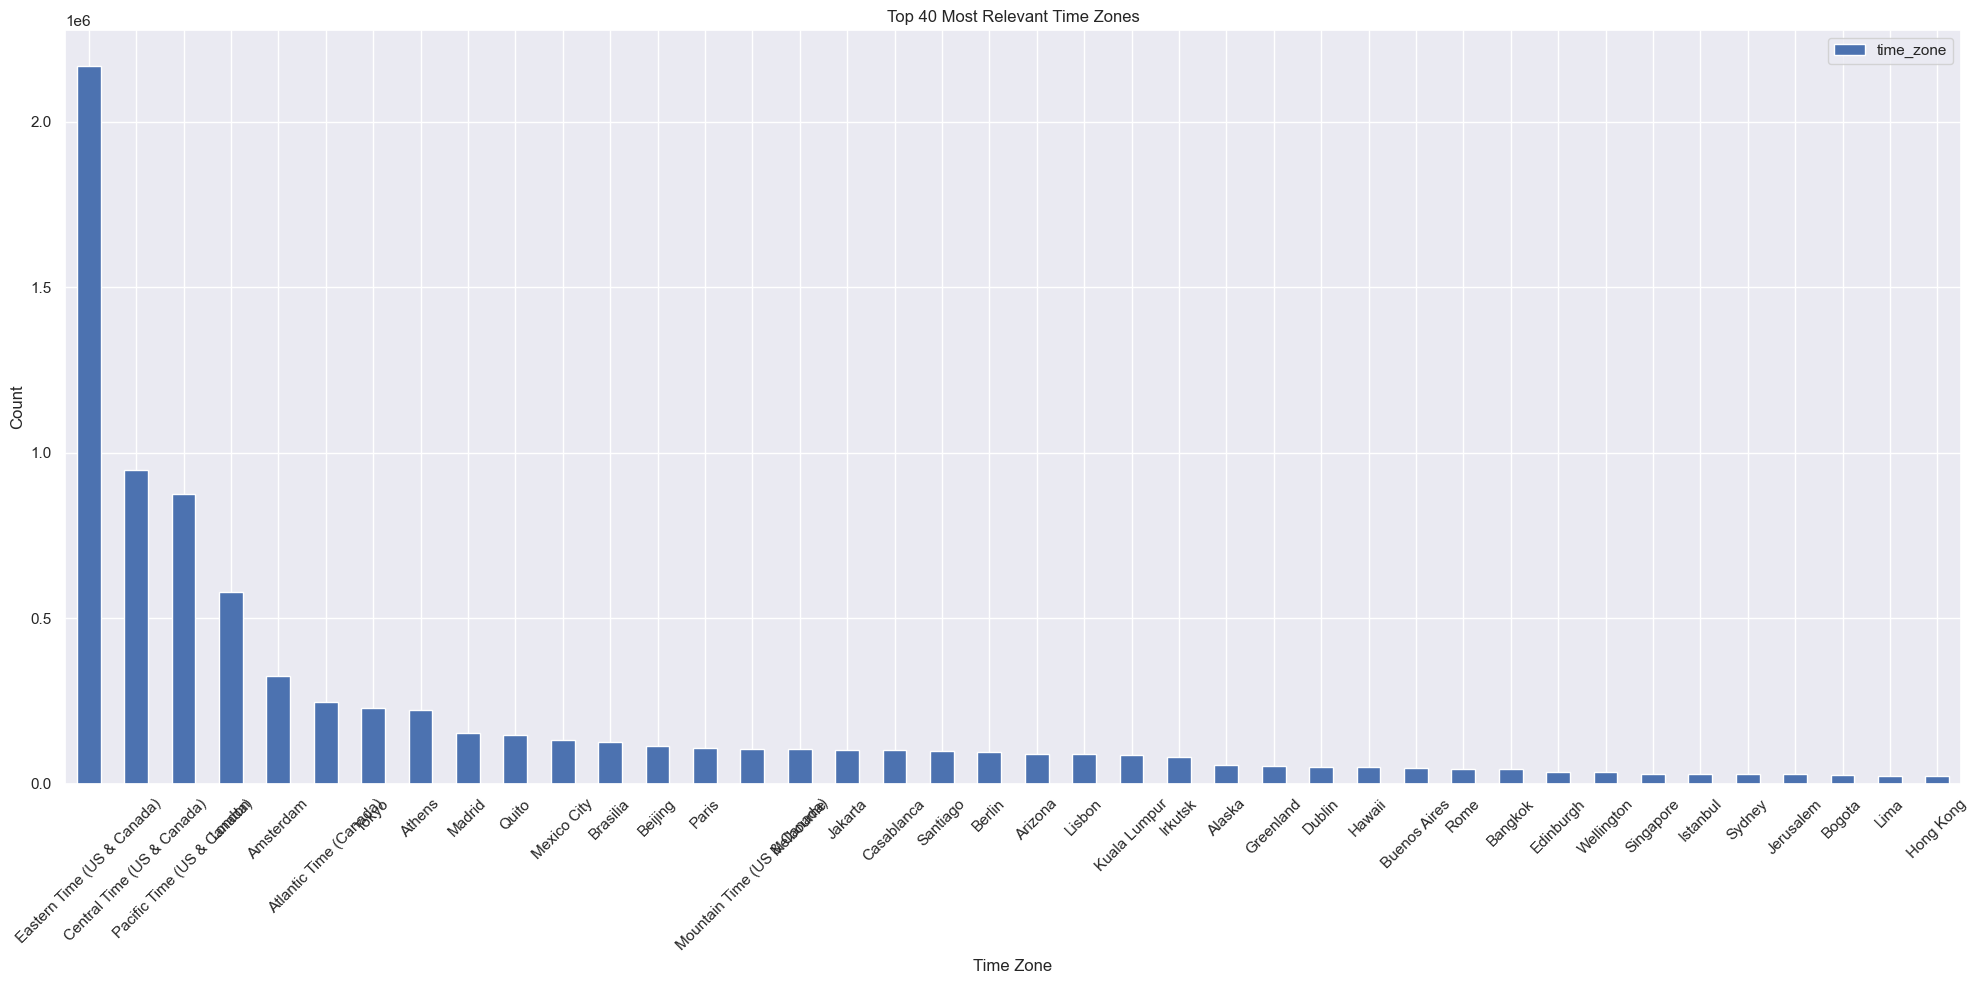

In [12]:
# Most relevant Time zones and cities

pd.DataFrame(cont_df['time_zone'].value_counts().nlargest(40)).plot(kind = 'bar', figsize=(20,10))

plt.xticks(rotation=45)
plt.xlabel('Time Zone')
plt.ylabel('Count')
plt.title('Top 40 Most Relevant Time Zones');
plt.tight_layout()
#plt.show()



## Languages in Dataset

In [13]:
#Different languages in dataset

cont_df['lang'].value_counts().index

Index(['en', 'es', 'ja', 'pt', 'en-gb', 'nl', 'fr', 'de', 'it', 'id', 'tr',
       'ru', 'ko', 'sv', 'ca', 'pl', 'el', 'gl', 'fi', 'ar', 'xx-lc', 'no',
       'th', 'uk', 'hu', 'zh-tw', 'eu', 'da', 'cs', 'zh-cn', 'ro', 'msa', 'fa',
       'fil', 'he'],
      dtype='object')

In [14]:
# Tweet languages

cont_df['tweet_lang'].value_counts().index

Index(['en', 'es', 'et', 'in', 'ja', 'it', 'sk', 'fr', 'de', 'ht', 'pt', 'tl',
       'pl', 'nl', 'cy', 'ro', 'no', 'da', 'fi', 'id', 'sv', 'sl', 'tr', 'zh',
       'bs', 'hu', 'lt', 'is', 'vi', 'hr', 'ru', 'ko', 'lv', 'bg', 'fa', 'und',
       'el', 'th', 'uk', 'ar', 'sr', 'iw', 'he', 'hy', 'ka'],
      dtype='object')

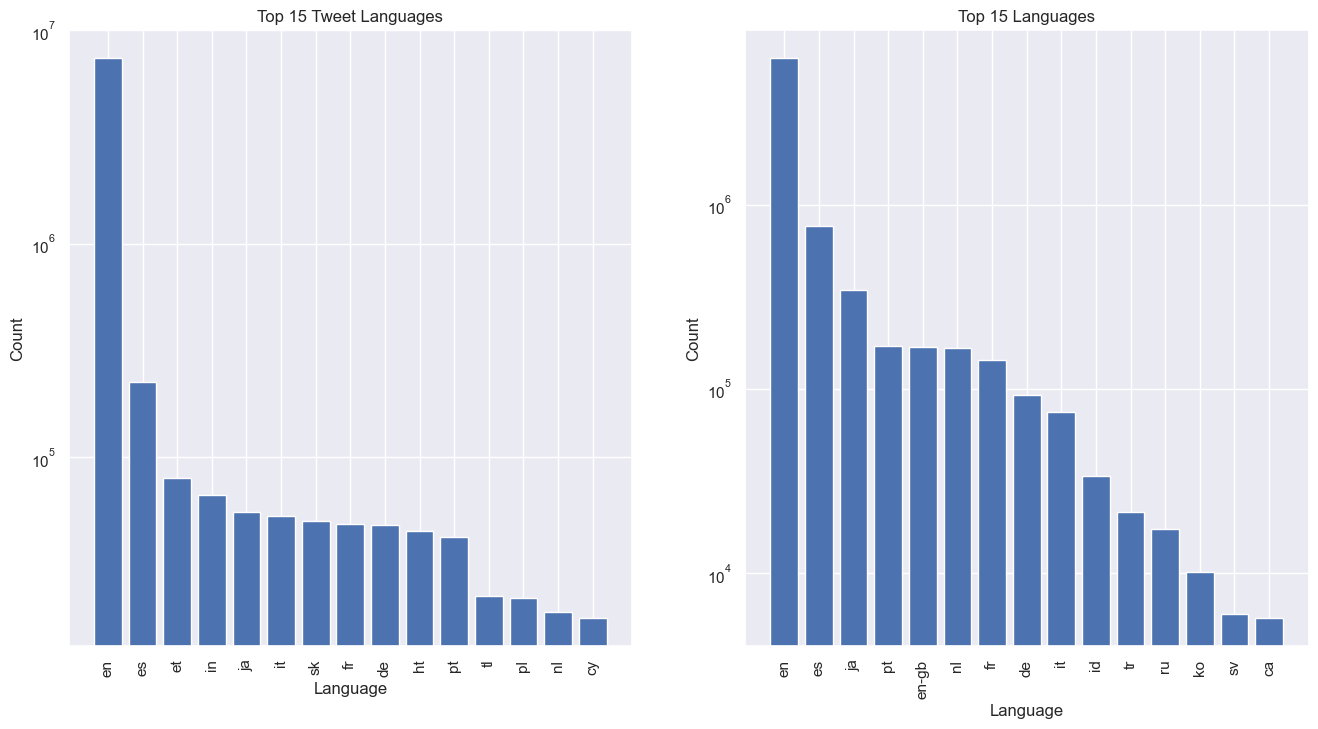

In [15]:
# Two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


# Plot 1: tweet_lang
tweet_lang_counts = cont_df['tweet_lang'].value_counts().nlargest(15)
ax1.bar(tweet_lang_counts.index, tweet_lang_counts.values)
ax1.set_yscale('log')
ax1.set_title('Top 15 Tweet Languages')
ax1.set_xlabel('Language')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=90)

# Plot 2: lang
lang_counts = cont_df['lang'].value_counts().nlargest(15)
ax2.bar(lang_counts.index, lang_counts.values)
ax2.set_yscale('log')
ax2.set_title('Top 15 Languages')
ax2.set_xlabel('Language')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=90)


#plt.tight_layout()
plt.show()


## **_1) Tweet Lang: language used to write the tweet_**

## **_2) Lang: song language_**

## **_we keep the whole "tweet lang" variable as it is directly linked with "hashtag" variable, which is linked to the "vader_score" variable that we will use to create our target variable_** 

## **_On the contrary, "lang" variable will be limited to the first top 8 languages (entries > 50000) and the other values will be dropped_**

In [16]:
#Number of ocurrences of the 8 mosth higly ranked languages with entries > 50000

lang_counts = {}

# Loop through the language values and count occurrences of each language code
for code in ["en", "es", "ja", "pt","nl", 'fr', 'de', 'it', 'id']:
    count = sum(1 for lang in cont_df['lang'] if lang.startswith(code))
    lang_counts[code] = count

print(lang_counts)

#{'en': 6427368, 'es': 770505, 'ja': 345307, 'pt': 170751, 'nl': 167426, 'fr': 142855, 'de': 92295, 'it': 74803,}

{'en': 6427368, 'es': 770505, 'ja': 345307, 'pt': 170751, 'nl': 167426, 'fr': 142855, 'de': 92295, 'it': 74803, 'id': 33646}


In [17]:
#Filtering dataframe 8 most relevant languages en and en-gb are one language

prefixes_to_keep = ['en', 'es', 'ja', 'pt', 'nl' , 'fr', 'de', 'it']
cont_df= cont_df[cont_df['lang'].str.startswith(tuple(prefixes_to_keep))]
value_counts = cont_df['lang'].value_counts()
print(value_counts)

en       6257512
es        770505
ja        345307
pt        170751
en-gb     169856
nl        167426
fr        142855
de         92295
it         74803
Name: lang, dtype: int64


In [18]:
#replace en_gb with en

cont_df['lang'].replace('en-gb', "en",inplace=True)
value_counts = cont_df['lang'].value_counts()
print(value_counts)

en    6427368
es     770505
ja     345307
pt     170751
nl     167426
fr     142855
de      92295
it      74803
Name: lang, dtype: int64


# Histogram cont_df Database

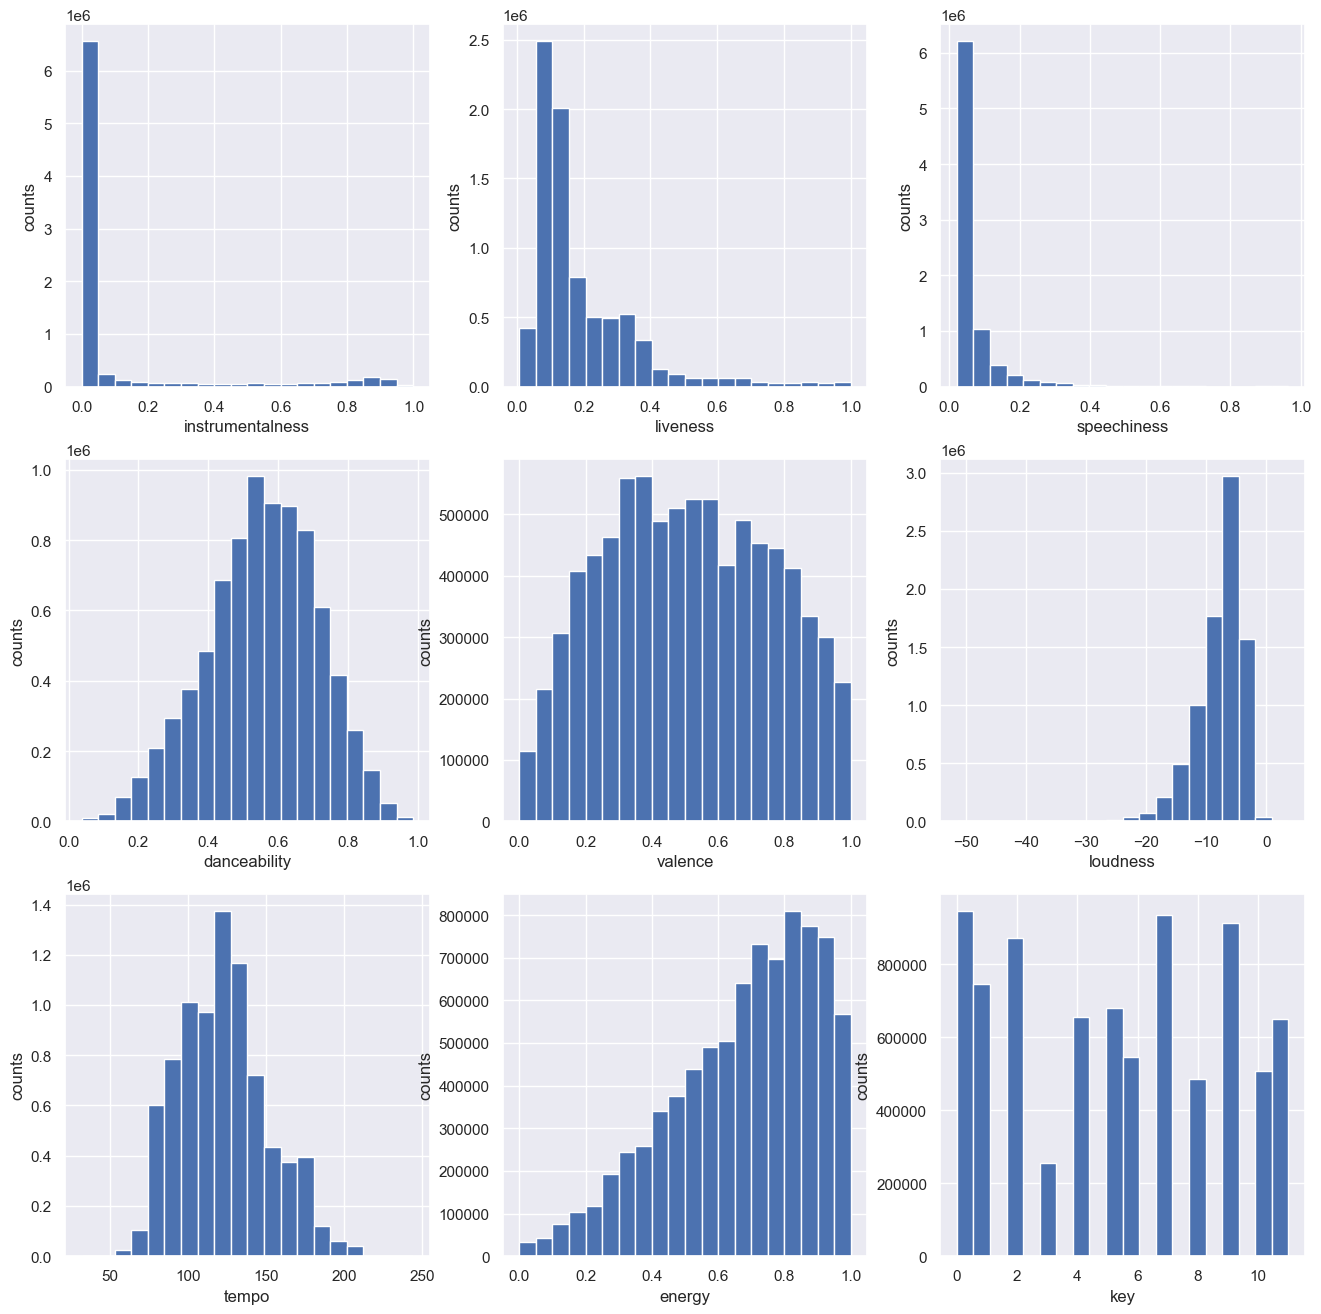

In [19]:
# Features histogram

fig = plt.figure(figsize = (16, 16))

plt.title('Histogram of all variables')

plt.subplot(331)
plt.hist(cont_df['instrumentalness'], bins = 20)  
plt.xlabel('instrumentalness')
plt.ylabel('counts')

plt.subplot(332)
plt.hist(cont_df['liveness'], bins = 20)  
plt.xlabel('liveness')
plt.ylabel('counts')

plt.subplot(333)
plt.hist(cont_df['speechiness'], bins = 20)  
plt.xlabel('speechiness')
plt.ylabel('counts')

plt.subplot(334)
plt.hist(cont_df['danceability'], bins = 20)  
plt.xlabel('danceability')
plt.ylabel('counts')

plt.subplot(335)
plt.hist(cont_df['valence'], bins = 20)  
plt.xlabel('valence')
plt.ylabel('counts')

plt.subplot(336)
plt.hist(cont_df['loudness'], bins = 20)  
plt.xlabel('loudness')
plt.ylabel('counts')

plt.subplot(337)
plt.hist(cont_df['tempo'], bins = 20)  
plt.xlabel('tempo')
plt.ylabel('counts')


plt.subplot(338)
plt.hist(cont_df['energy'], bins = 20)  
plt.xlabel('energy')
plt.ylabel('counts')

plt.subplot(339)
plt.hist(cont_df['key'], bins = 20)  
plt.xlabel('key')
plt.ylabel('counts');
#plt.show()

## **_further histograms_**

Text(0, 0.5, 'counts')

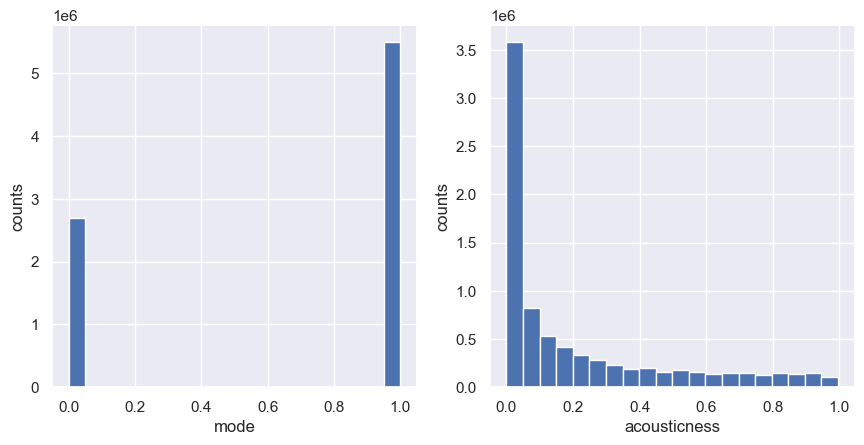

In [20]:
# further features histograms

fig = plt.figure(figsize = (16, 16))

plt.title('Histogram of all variables')

plt.subplot(331)
plt.hist(cont_df['mode'], bins = 20)  
plt.xlabel('mode')
plt.ylabel('counts')

plt.subplot(332)
plt.hist(cont_df['acousticness'], bins = 20)  
plt.xlabel('acousticness')
plt.ylabel('counts')

# Database No. 2: Sentiment_Values (sent_df)
## Database exploration

In [21]:
sent_df.head()

hashtag   vader_min   vader_max   vader_sum  vader_avg  \
0          relaxtime         0.8         0.8         2.4        0.8   
1  melovechilicheese         0.8         0.8         0.8        0.8   
2         greatmusic         0.8         0.8         2.4        0.8   
3         rockballad         0.7         0.7         0.7        0.7   
4         amonamarth         0.3         0.3         0.3        0.3   

     afinn_min   afinn_max   afinn_sum   afinn_avg   ol_min   ol_max   ol_sum  \
0          NaN         NaN         NaN         NaN   0.7375   0.7375   0.7375   
1          NaN         NaN         NaN         NaN   0.9000   0.9000   0.9000   
2          1.0         1.0         1.0         1.0   0.8875   0.8875   0.8875   
3          NaN         NaN         NaN         NaN      NaN      NaN      NaN   
4          NaN         NaN         NaN         NaN      NaN      NaN      NaN   

    ol_avg   ss_min   ss_max   ss_sum   ss_avg  
0   0.7375      NaN      NaN      NaN      NaN  
1   0.9000      1.0      1.0      1.0      1.0  
2   0.8875      1.0      1.0      1.0      1.0  
3      NaN      NaN      NaN      NaN      NaN  
4      NaN      0.0      0.0      0.0      0.0

In [22]:
sent_df.info()
sent_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hashtag      5290 non-null   object 
 1    vader_min   3867 non-null   float64
 2    vader_max   3867 non-null   float64
 3    vader_sum   3867 non-null   float64
 4   vader_avg    3867 non-null   float64
 5     afinn_min  255 non-null    float64
 6    afinn_max   255 non-null    float64
 7    afinn_sum   255 non-null    float64
 8    afinn_avg   255 non-null    float64
 9    ol_min      2635 non-null   float64
 10   ol_max      2635 non-null   float64
 11   ol_sum      2635 non-null   float64
 12   ol_avg      2635 non-null   float64
 13   ss_min      2823 non-null   float64
 14   ss_max      2823 non-null   float64
 15   ss_sum      2823 non-null   float64
 16   ss_avg      2823 non-null   float64
dtypes: float64(16), object(1)
memory usage: 702.7+ KB


Index(['hashtag', ' vader_min', ' vader_max', ' vader_sum', 'vader_avg',
       '  afinn_min', ' afinn_max', ' afinn_sum', ' afinn_avg', ' ol_min',
       ' ol_max', ' ol_sum', ' ol_avg', ' ss_min', ' ss_max', ' ss_sum',
       ' ss_avg'],
      dtype='object')

## sent_df: statistical description numerical values

In [23]:
sent_df.describe().T

count      mean       std     min     25%     50%     75%   max
 vader_min   3867.0  0.495035  0.239754  0.1000  0.3000  0.4000  0.7000  1.00
 vader_max   3867.0  0.513007  0.239695  0.1000  0.3000  0.6000  0.7000  1.00
 vader_sum   3867.0  0.921877  0.629695  0.1000  0.6000  0.7000  1.4000  4.80
vader_avg    3867.0  0.503563  0.236347  0.1000  0.3000  0.6000  0.7000  1.00
  afinn_min   255.0  0.745098  0.436663  0.0000  0.0000  1.0000  1.0000  1.00
 afinn_max    255.0  0.752941  0.432149  0.0000  1.0000  1.0000  1.0000  1.00
 afinn_sum    255.0  0.858824  0.648796  0.0000  1.0000  1.0000  1.0000  3.00
 afinn_avg    255.0  0.749020  0.432158  0.0000  0.5000  1.0000  1.0000  1.00
 ol_min      2635.0  0.523107  0.262607  0.0375  0.2875  0.6125  0.7375  0.90
 ol_max      2635.0  0.544905  0.260557  0.0375  0.3125  0.6500  0.7375  0.90
 ol_sum      2635.0  0.760550  0.535178  0.0375  0.3500  0.6875  0.9000  2.85
 ol_avg      2635.0  0.534016  0.256876  0.0375  0.3000  0.6125  0.7375  0.90
 ss_min      2823.0  0.451647  0.497745  0.0000  0.0000  0.0000  1.0000  1.00
 ss_max      2823.0  0.491321  0.500013  0.0000  0.0000  0.0000  1.0000  1.00
 ss_sum      2823.0  0.654269  0.816764  0.0000  0.0000  0.0000  1.0000  3.00
 ss_avg      2823.0  0.471248  0.489264  0.0000  0.0000  0.0000  1.0000  1.00

## Histograms sent_df

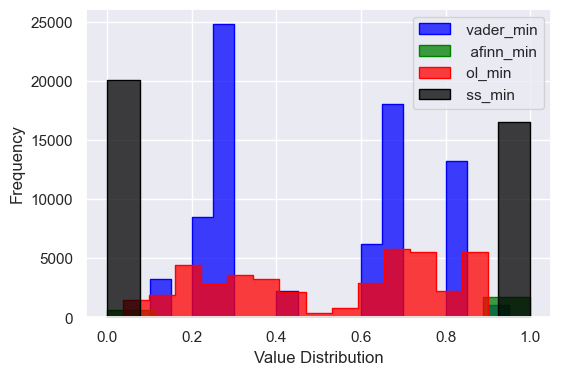

In [24]:
# List of columns to plot
columns_to_plot = [" vader_min", "  afinn_min", " ol_min", " ss_min"]

# Set up the figure
plt.figure(figsize=(6, 4))

# Define colors for each histogram
hist_colors = ['blue', 'green', 'red', 'black']

# Loop through the columns and create histograms with different colors
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=sent_df, x=column, element='step', stat='frequency', common_norm=False, color=hist_colors[i], label=column)

plt.xlabel("Value Distribution")
plt.ylabel("Frequency")
plt.legend()
plt.show()


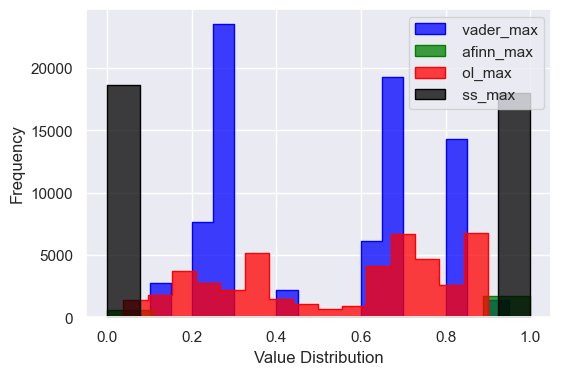

In [25]:


# List of columns to plot
columns_to_plot = [" vader_max", " afinn_max", " ol_max", " ss_max"]

# Set up the figure
plt.figure(figsize=(6, 4))

# Define colors for each histogram
hist_colors = ['blue', 'green', 'red', 'black']

# Loop through the columns and create histograms with different colors
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=sent_df, x=column, element='step', stat='frequency', common_norm=False, color=hist_colors[i], label=column)

plt.xlabel("Value Distribution")
plt.ylabel("Frequency")
plt.legend()
plt.show()


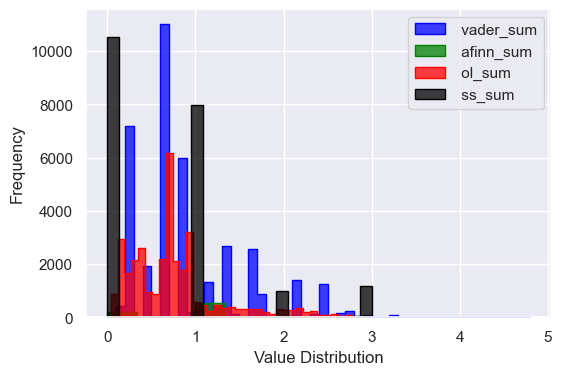

In [26]:


# List of columns to plot
columns_to_plot = [" vader_sum", " afinn_sum", " ol_sum", " ss_sum"]

# Set up the figure
plt.figure(figsize=(6, 4))

# Define colors for each histogram
hist_colors = ['blue', 'green', 'red', 'black']

# Loop through the columns and create histograms with different colors
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=sent_df, x=column, element='step', stat='frequency', common_norm=False, color=hist_colors[i], label=column)

plt.xlabel("Value Distribution")
plt.ylabel("Frequency")
plt.legend()
plt.show()


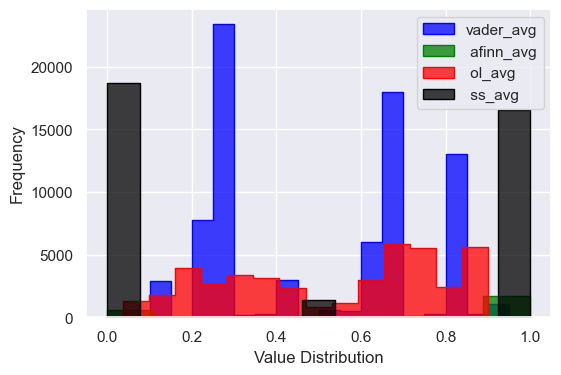

In [27]:


# List of columns to plot
columns_to_plot = ["vader_avg", " afinn_avg", " ol_avg", " ss_avg"]

# Set up the figure
plt.figure(figsize=(6, 4))

# Define colors for each histogram
hist_colors = ['blue', 'green', 'red', 'black']

# Loop through the columns and create histograms with different colors
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=sent_df, x=column, element='step', stat='frequency', common_norm=False, color=hist_colors[i], label=column)

plt.xlabel("Value Distribution")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## Missing Values sent_df

In [28]:
# NaN values
# Vader is about social media text analysis

sent_isna = sent_df.isna().sum().sort_values(ascending=False)/len(sent_df)
print('col_count:',sent_isna.count())

df_data_sent = pd.DataFrame([sent_isna]).T
df_data_sent.columns = ['Missing_Values']

# Display the DataFrame
df_data_sent

col_count: 17


Missing_Values
 afinn_avg         0.951796
  afinn_min        0.951796
 afinn_max         0.951796
 afinn_sum         0.951796
 ol_sum            0.501890
 ol_avg            0.501890
 ol_min            0.501890
 ol_max            0.501890
 ss_sum            0.466352
 ss_max            0.466352
 ss_min            0.466352
 ss_avg            0.466352
 vader_min         0.268998
vader_avg          0.268998
 vader_sum         0.268998
 vader_max         0.268998
hashtag            0.000000

## **_drop the columns with higher missing values of sent-df_**

## **_Vader is a lexicon that was specifically designed for social media text analysis, including hashtags_**
## **_The Vader lexicon can handle complexities of social media language, such as sarcasm, slang, and emoticons_**

In [ ]:
# As Vader is the best ideal lexicon in the context that we are working on, we are going to 
#drop the other columns, which also have more missing value proportion than Vader score values 

sent_df = sent_df.iloc[:, :5]
sent_df.head()

## **_rename the columns of sent-df_**

In [30]:
#rename the columns of sent-df

sent_df.columns

#columns should be renamed

sent_df.rename(columns = {' vader_min' : 'vader_min' , ' vader_max' : 'vader_max' , ' vader_sum' : 'vader_sum'}, inplace = True)

In [31]:
# Check missing values

sent_isna = sent_df.isna().sum().sort_values(ascending=False)/len(sent_df)
print('col_count:',sent_isna.count())

df_data_sent = pd.DataFrame([sent_isna]).T
df_data_sent.columns = ['Missing_Values']

# Display the DataFrame
df_data_sent

col_count: 5


Missing_Values
vader_min        0.268998
vader_max        0.268998
vader_sum        0.268998
vader_avg        0.268998
hashtag          0.000000

## **_Vader Values Histogram of sent-df_**

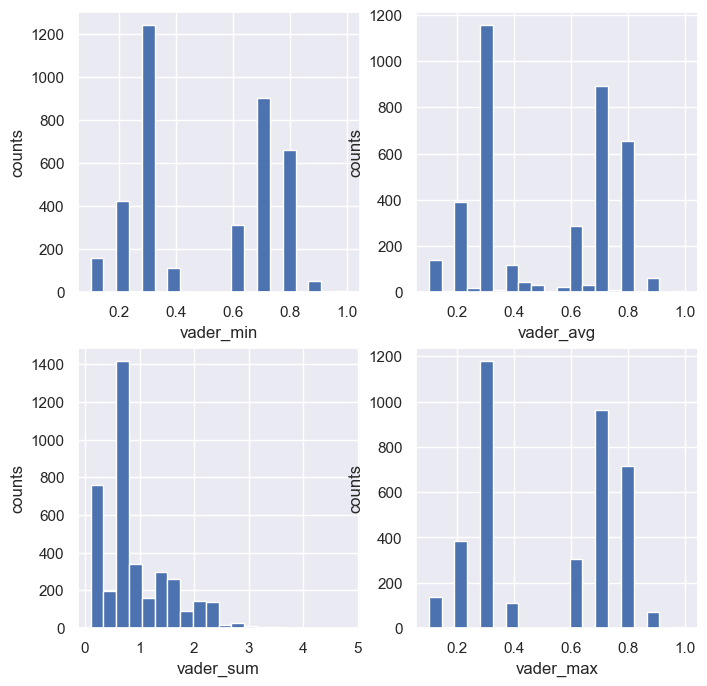

In [32]:
# Vader values histograms

fig = plt.figure(figsize = (8, 8))

plt.title('Sentiment Values')

plt.subplot(221)
plt.hist(sent_df['vader_min'], bins = 20)  
plt.xlabel('vader_min')
plt.ylabel('counts')


plt.subplot(222)
plt.hist(sent_df['vader_avg'], bins = 20)  
plt.xlabel('vader_avg')
plt.ylabel('counts')

plt.subplot(223)
plt.hist(sent_df['vader_sum'], bins = 20)  
plt.xlabel('vader_sum')
plt.ylabel('counts')

plt.subplot(224)
plt.hist(sent_df['vader_max'], bins = 20)  
plt.xlabel('vader_max')
plt.ylabel('counts');



#plt.show()

## Remaining sent_df columns

In [33]:
sent_df.columns

Index(['hashtag', 'vader_min', 'vader_max', 'vader_sum', 'vader_avg'], dtype='object')

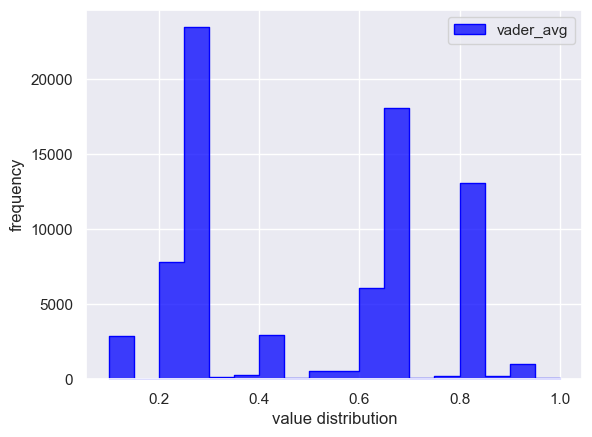

In [34]:
sns.histplot(data=sent_df, x='vader_avg', element='step', stat='frequency', common_norm=False, color='blue', label ="vader_avg")



plt.xlabel("value distribution")
plt.ylabel("frequency")
plt.legend()
plt.show();

## **_The range for the Vader average score is -1 to +1.Here, we can see that we don't have negative values in our dataset. There is a big proportion between 0.2 and 0.3_**

In [35]:
sent_df.sort_values(['vader_avg'], ascending=True).head(10)

hashtag  vader_min  vader_max  \
1181  screamingforvengeancespecial30thanniversaryedi...        0.1        0.1   
1295                                         angrybirds        0.1        0.1   
220                                             sobbing        0.1        0.1   
2705                                      screamforjeff        0.1        0.1   
1266                                       heartbreaker        0.1        0.1   
2767                                         stophating        0.1        0.1   
2769                                    hatersgonnahate        0.1        0.1   
1242                                             afraid        0.1        0.1   
1234                                         disgusting        0.1        0.1   
5153                                        ragetuesday        0.1        0.1   

      vader_sum  vader_avg  
1181        0.2        0.1  
1295        0.3        0.1  
220         0.2        0.1  
2705        0.2        0.1  
1266        0.3        0.1  
2767        0.1        0.1  
2769        0.2        0.1  
1242        0.3        0.1  
1234        0.3        0.1  
5153        0.2        0.1

# Database No.3: User_Track_Time_Hashtag (utht_df)
## Database exploration

In [36]:
utht_df.head()

user_id                          track_id     hashtag  \
0    81496937  cd52b3e5b51da29e5893dba82a418a4b  nowplaying   
1    81496937  cd52b3e5b51da29e5893dba82a418a4b        goth   
2    81496937  cd52b3e5b51da29e5893dba82a418a4b   deathrock   
3    81496937  cd52b3e5b51da29e5893dba82a418a4b    postpunk   
4  2205686924  da3110a77b724072b08f231c9d6f7534  NowPlaying   

            created_at  
0  2014-01-01 05:54:21  
1  2014-01-01 05:54:21  
2  2014-01-01 05:54:21  
3  2014-01-01 05:54:21  
4  2014-01-01 05:54:22

In [37]:
utht_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560113 entries, 0 to 17560112
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int64 
 1   track_id    object
 2   hashtag     object
 3   created_at  object
dtypes: int64(1), object(3)
memory usage: 535.9+ MB


## **_utht_df has no relevant numerical values_**

In [38]:
utht_df.describe(include=[object]).T

count   unique                               top     freq
track_id    17560113   344536  e24deb4963769d25e2c03ad9bf58a028    82551
hashtag     17560112    49912                        nowplaying  5765350
created_at  17560113  8743896               2014-07-13 11:18:52       70

## Missing Values utht_df

In [39]:
utht_isna = utht_df.isna().sum().sort_values(ascending=False)/len(utht_df)
print('col_count:',utht_isna.count())

df_data_utht = pd.DataFrame([utht_isna]).T
df_data_utht.columns = ['Missing_Values']

# Display the DataFrame
df_data_utht

col_count: 4


Missing_Values
hashtag       5.694724e-08
user_id       0.000000e+00
track_id      0.000000e+00
created_at    0.000000e+00

## Some relevant Hashtags

In [40]:
utht_df['hashtag'].value_counts().to_frame() 

hashtag
nowplaying             5765350
NowPlaying             4954325
listenlive             2740670
nowPlaying              156403
Nowplaying              124702
...                        ...
4añossinCerati               1
EstaEsMúsicaNoMamadas        1
jodidos                      1
FreshAndNews                 1
criminallyunderrated         1

[49912 rows x 1 columns]

# Database No. 4 alternative database from Spotify (tracks_df)
## Database exploration

In [41]:
#calling a dataframe from the CSV regarding information from Spotify

tracks_df = pd.read_csv('dataset.csv')
tracks_df.head()
print('tracks_df shape:', tracks_df.shape) #(114000, 21)

tracks_df shape: (114000, 21)


In [42]:
tracks_df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [43]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## tracks_df: statistical description numerical and categorical values

In [44]:
tracks_df.describe().T

count           mean            std     min  \
Unnamed: 0        114000.0   56999.500000   32909.109681   0.000   
popularity        114000.0      33.238535      22.305078   0.000   
duration_ms       114000.0  228029.153114  107297.712645   0.000   
danceability      114000.0       0.566800       0.173542   0.000   
energy            114000.0       0.641383       0.251529   0.000   
key               114000.0       5.309140       3.559987   0.000   
loudness          114000.0      -8.258960       5.029337 -49.531   
mode              114000.0       0.637553       0.480709   0.000   
speechiness       114000.0       0.084652       0.105732   0.000   
acousticness      114000.0       0.314910       0.332523   0.000   
instrumentalness  114000.0       0.156050       0.309555   0.000   
liveness          114000.0       0.213553       0.190378   0.000   
valence           114000.0       0.474068       0.259261   0.000   
tempo             114000.0     122.147837      29.978197   0.000   
time_signature    114000.0       3.904035       0.432621   0.000   

                           25%            50%          75%          max  
Unnamed: 0         28499.75000   56999.500000   85499.2500   113999.000  
popularity            17.00000      35.000000      50.0000      100.000  
duration_ms       174066.00000  212906.000000  261506.0000  5237295.000  
danceability           0.45600       0.580000       0.6950        0.985  
energy                 0.47200       0.685000       0.8540        1.000  
key                    2.00000       5.000000       8.0000       11.000  
loudness             -10.01300      -7.004000      -5.0030        4.532  
mode                   0.00000       1.000000       1.0000        1.000  
speechiness            0.03590       0.048900       0.0845        0.965  
acousticness           0.01690       0.169000       0.5980        0.996  
instrumentalness       0.00000       0.000042       0.0490        1.000  
liveness               0.09800       0.132000       0.2730        1.000  
valence                0.26000       0.464000       0.6830        0.995  
tempo                 99.21875     122.017000     140.0710      243.372  
time_signature         4.00000       4.000000       4.0000        5.000

In [45]:
tracks_df.describe(include=[object])

track_id      artists                  album_name  \
count                   114000       113999                      113999   
unique                   89741        31437                       46589   
top     6S3JlDAGk3uu3NtZbPnuhS  The Beatles  Alternative Christmas 2022   
freq                         9          279                         195   

             track_name track_genre  
count            113999      114000  
unique            73608         114  
top     Run Rudolph Run    acoustic  
freq                151        1000

## Missing Values tracks_df

In [46]:
tracks_isna = tracks_df.isna().sum().sort_values(ascending=False)/len(tracks_df)
print('col_count:',tracks_isna.count())

df_data_tracks = pd.DataFrame([tracks_isna]).T
df_data_tracks.columns = ['Missing_Values']

# Display the DataFrame
df_data_tracks

col_count: 21


Missing_Values
artists                 0.000009
album_name              0.000009
track_name              0.000009
Unnamed: 0              0.000000
mode                    0.000000
time_signature          0.000000
tempo                   0.000000
valence                 0.000000
liveness                0.000000
instrumentalness        0.000000
acousticness            0.000000
speechiness             0.000000
key                     0.000000
loudness                0.000000
track_id                0.000000
energy                  0.000000
danceability            0.000000
explicit                0.000000
duration_ms             0.000000
popularity              0.000000
track_genre             0.000000

## **_dropping useles columns_**

In [47]:
tracks_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [48]:
tracks_df.shape

(114000, 20)

## Grouping the data of tracks_df by artist, album_name and track_name

In [49]:
# Different data grouping

tracks_df.groupby(['artists', 'album_name']).agg('track_name').value_counts(ascending = False).to_frame().head(50)




#cont_df.groupby(['time_zone', 'lang', 'tweet_lang']).agg('count').head(50)

track_name
artists                                            album_name                               track_name                                                    
!nvite                                             pagadoff                                 pagadoff                                                     1
                                                   strolling                                strolling                                                    1
"Puppy Dog Pals" Cast                              Puppy Dog Pals: Disney Junior Music      Going on a Mission                                           1
                                                                                            Puppy Dog Pals Main Title Theme                              1
"Weird Al" Yankovic                                "Weird Al" Yankovic                      Gotta Boogie                                                 1
                                                                                            I'll Be Mellow When I'm Dead                                 1
                                                                                            Such a Groovy Guy                                            1
                                                                                            The Check's In the Mail                                      1
                                                   Bad Hair Day                             Amish Paradise (Parody of "Gangsta's Paradise" ...           1
                                                   In 3-D                                   King of Suede                                                1
                                                   Polka Party                              Good Enough for Now                                          1
                                                   Poodle Hat                               Genius In France                                             1
                                                   Running With Scissors                    Grapefruit Diet (Parody of "Zoot Suit Riot" by ...           1
                                                   The Essential "Weird Al" Yankovic        Gump (Parody of "Lump" by The Presidents of the...           1
                                                                                            Since You've Been Gone                                       1
                                                                                            The Biggest Ball of Twine In Minnesota                       1
                                                                                            The Night Santa Went Crazy                                   1
                                                                                            Trapped In the Drive-Thru (Parody of "Trapped I...           1
                                                   UHF: "Weird Al" Yankovic                 Spatula City                                                 1
#Kids;Nursery Rhymes;Nursery Rhymes and Kids Songs Nursery Rhymes For Young Kids            Wheels on The Bus Go Round and Round (Instrumen...           1
$affie                                             summertime                               summertime                                                   1
$affie;lofi stu                                    Tendenzies                               Tendenzies                                                   1
&ME;Rampa;Adam Port;Sofie Royer                    Discoteca                                Discoteca                                                    1
'Falsettos' 2016 Broadway Company                  Falsettos (2016 Broadway Cast Recording) Jason's Bar Mitzvah                                          1
'Til Tuesday                                       Coming Up Close: A Retrospective         Voices Carry - Single 

## **_Track Genres_**

In [50]:
# Display the track genres

names = tracks_df["track_genre"].value_counts(dropna=False).keys().tolist()
counts = tracks_df["track_genre"].value_counts(dropna=False).tolist()

results = []

for name, count in zip(names, counts):
    results.append({"name": name, "count": count})

results
#len(results)  #114 genre

[{'name': 'acoustic', 'count': 1000},
 {'name': 'punk-rock', 'count': 1000},
 {'name': 'progressive-house', 'count': 1000},
 {'name': 'power-pop', 'count': 1000},
 {'name': 'pop', 'count': 1000},
 {'name': 'pop-film', 'count': 1000},
 {'name': 'piano', 'count': 1000},
 {'name': 'party', 'count': 1000},
 {'name': 'pagode', 'count': 1000},
 {'name': 'opera', 'count': 1000},
 {'name': 'new-age', 'count': 1000},
 {'name': 'mpb', 'count': 1000},
 {'name': 'minimal-techno', 'count': 1000},
 {'name': 'metalcore', 'count': 1000},
 {'name': 'metal', 'count': 1000},
 {'name': 'mandopop', 'count': 1000},
 {'name': 'malay', 'count': 1000},
 {'name': 'latino', 'count': 1000},
 {'name': 'latin', 'count': 1000},
 {'name': 'kids', 'count': 1000},
 {'name': 'k-pop', 'count': 1000},
 {'name': 'jazz', 'count': 1000},
 {'name': 'j-rock', 'count': 1000},
 {'name': 'j-pop', 'count': 1000},
 {'name': 'j-idol', 'count': 1000},
 {'name': 'j-dance', 'count': 1000},
 {'name': 'iranian', 'count': 1000},
 {'name':

## **_As can be seen, the data is balanced with 1000 entries for each genre_**

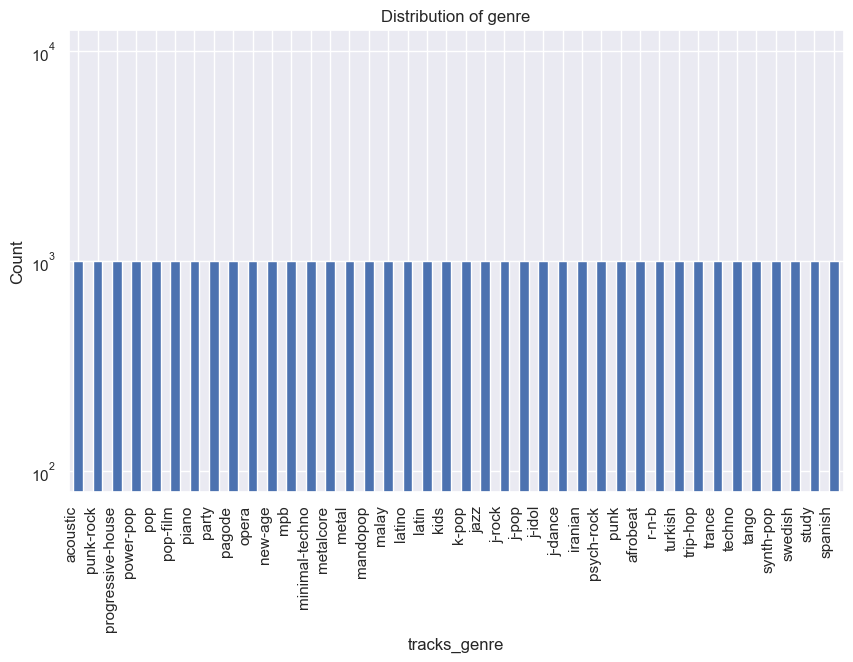

In [51]:
#Counts for the different track genres

track_genre_counts= tracks_df['track_genre'].value_counts()
plt.figure(figsize=(10,6))
top_genre= track_genre_counts.nlargest(40)
top_genre.plot(kind='bar')
plt.yscale('log')
plt.title('Distribution of genre')
plt.xlabel('tracks_genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show();

## **_Artist names_**

In [52]:
# Artist names 


artist_name = tracks_df["artists"].value_counts(dropna=False).keys().tolist()
artist_count = tracks_df["artists"].value_counts(dropna=False).tolist()
value_dict = dict(zip(artist_name, artist_count))
value_dict

{'The Beatles': 279,
 'George Jones': 271,
 'Stevie Wonder': 236,
 'Linkin Park': 224,
 'Ella Fitzgerald': 222,
 'Prateek Kuhad': 217,
 'Feid': 202,
 'Chuck Berry': 190,
 'Håkan Hellström': 183,
 'OneRepublic': 181,
 'The Beach Boys': 176,
 'my little airport': 171,
 'Elvis Presley': 169,
 'Charlie Brown Jr.': 169,
 'Red Hot Chili Peppers': 159,
 'Bryan Adams': 157,
 'Scooter': 155,
 'Daddy Yankee': 154,
 'Arctic Monkeys': 152,
 'BTS': 151,
 'Norah Jones': 150,
 'The Prophet': 145,
 'Hank Williams': 140,
 'Glee Cast': 139,
 'Don Omar': 137,
 'Vybz Kartel': 128,
 'Los Prisioneros': 126,
 'CoComelon': 122,
 'Anupam Roy': 121,
 'Seiko Matsuda': 118,
 'Burna Boy': 116,
 'Weezer': 111,
 'Dean Martin': 110,
 'Rob Zombie': 106,
 'Germaine Franco': 106,
 'Marilyn Manson': 105,
 'Hank Williams;Drifting Cowboys': 105,
 'J Balvin': 104,
 'Eikichi Yazawa': 103,
 'Nat King Cole': 102,
 'Eason Chan': 101,
 'Almafuerte': 99,
 'Little Symphony': 94,
 'Lamb of God': 94,
 'Maneva': 94,
 'Jay Chou': 93,


## **_The distribution of artists is not balanced; as can be seen, The Beatles have the most number of tracks (279) while other artists may have much less_**

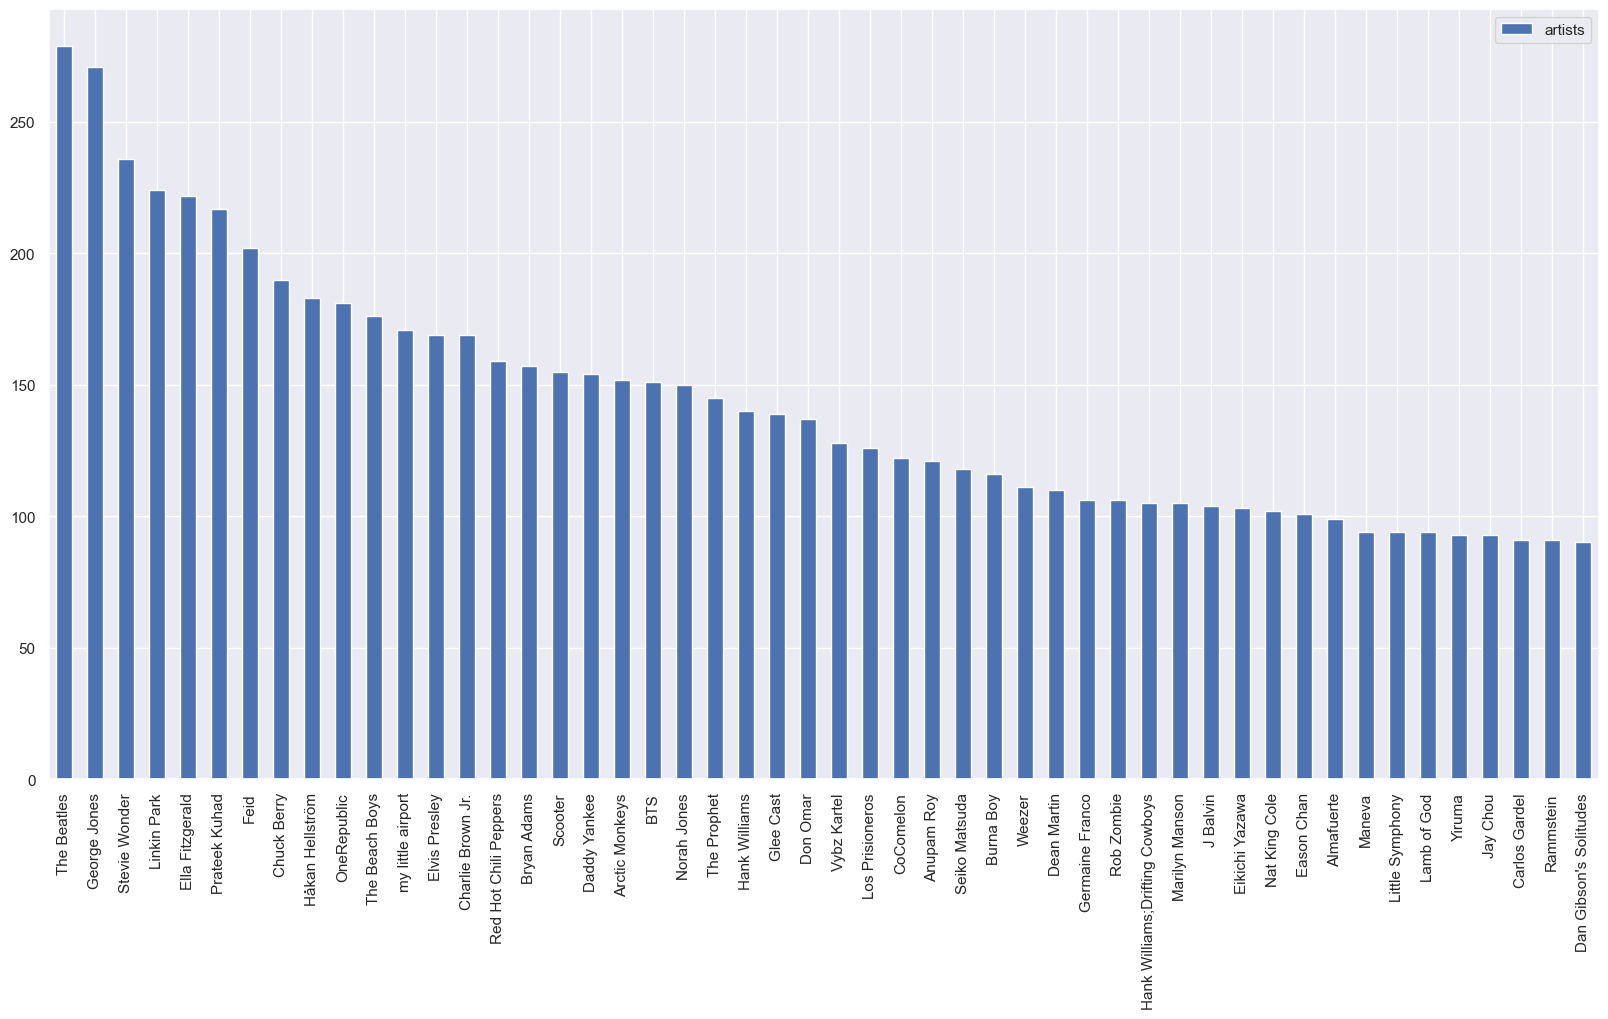

In [53]:
# Most relevant Artists

pd.DataFrame(tracks_df["artists"].value_counts().nlargest(50)).plot(kind = 'bar', figsize=(20,10));

#tracks_df["artists"].value_counts()[tracks_df["artists"].value_counts() > 10].plot(kind = 'bar', figsize=(20,10));

## **_Albums_**

In [54]:
#Display the different albums in the database

album_name = tracks_df["album_name"].value_counts(dropna=False).keys().tolist()
album_count = tracks_df["album_name"].value_counts(dropna=False).tolist()
album = []

for name, count in zip(album_name, album_count):
    album.append({"artist": album_name, "count": album_count})

album[:100]  # first 100 albums
#46589 albums

[{'artist': ['Alternative Christmas 2022',
   'Feliz Cumpleaños con Perreo',
   'Metal',
   'Halloween con perreito',
   'Halloween Party 2022',
   'The Complete Hank Williams',
   'Fiesta portatil',
   'Frescura y Perreo',
   'Esto me suena a Farra',
   'Perreo en Halloween',
   "On air 70's Hits",
   'Queda poco para la PAES 2.0',
   'Reggeaton Imperdible',
   'Halloween Metal Nights',
   'Homecoming Latin Party',
   'El perreo es el futuro',
   'Arbeitsmusik Herbst/Winter 2022/2023',
   'Greatest Hits',
   'Hans Zimmer: Epic Scores',
   'EDM Gaming Music Autumn/Winter 2022',
   'Christmas Songs 2022',
   'Reggaeton Mix Perreito',
   'Classical Christmas',
   'Clásicos de ahora: Perreo',
   "World's Best Christmas Playlist",
   'Mozart: A Night of Classics',
   'Mozart - All Day Classics',
   'Best 70s Rock Tunes',
   'Night Drive Autumn/Winter 2022/23',
   'Perreo Tenebroso Vol. 2',
   'Best Of Karneval',
   'All I Want For Christmas Is You',
   'Rock & Halloween',
   'Bájale como 7

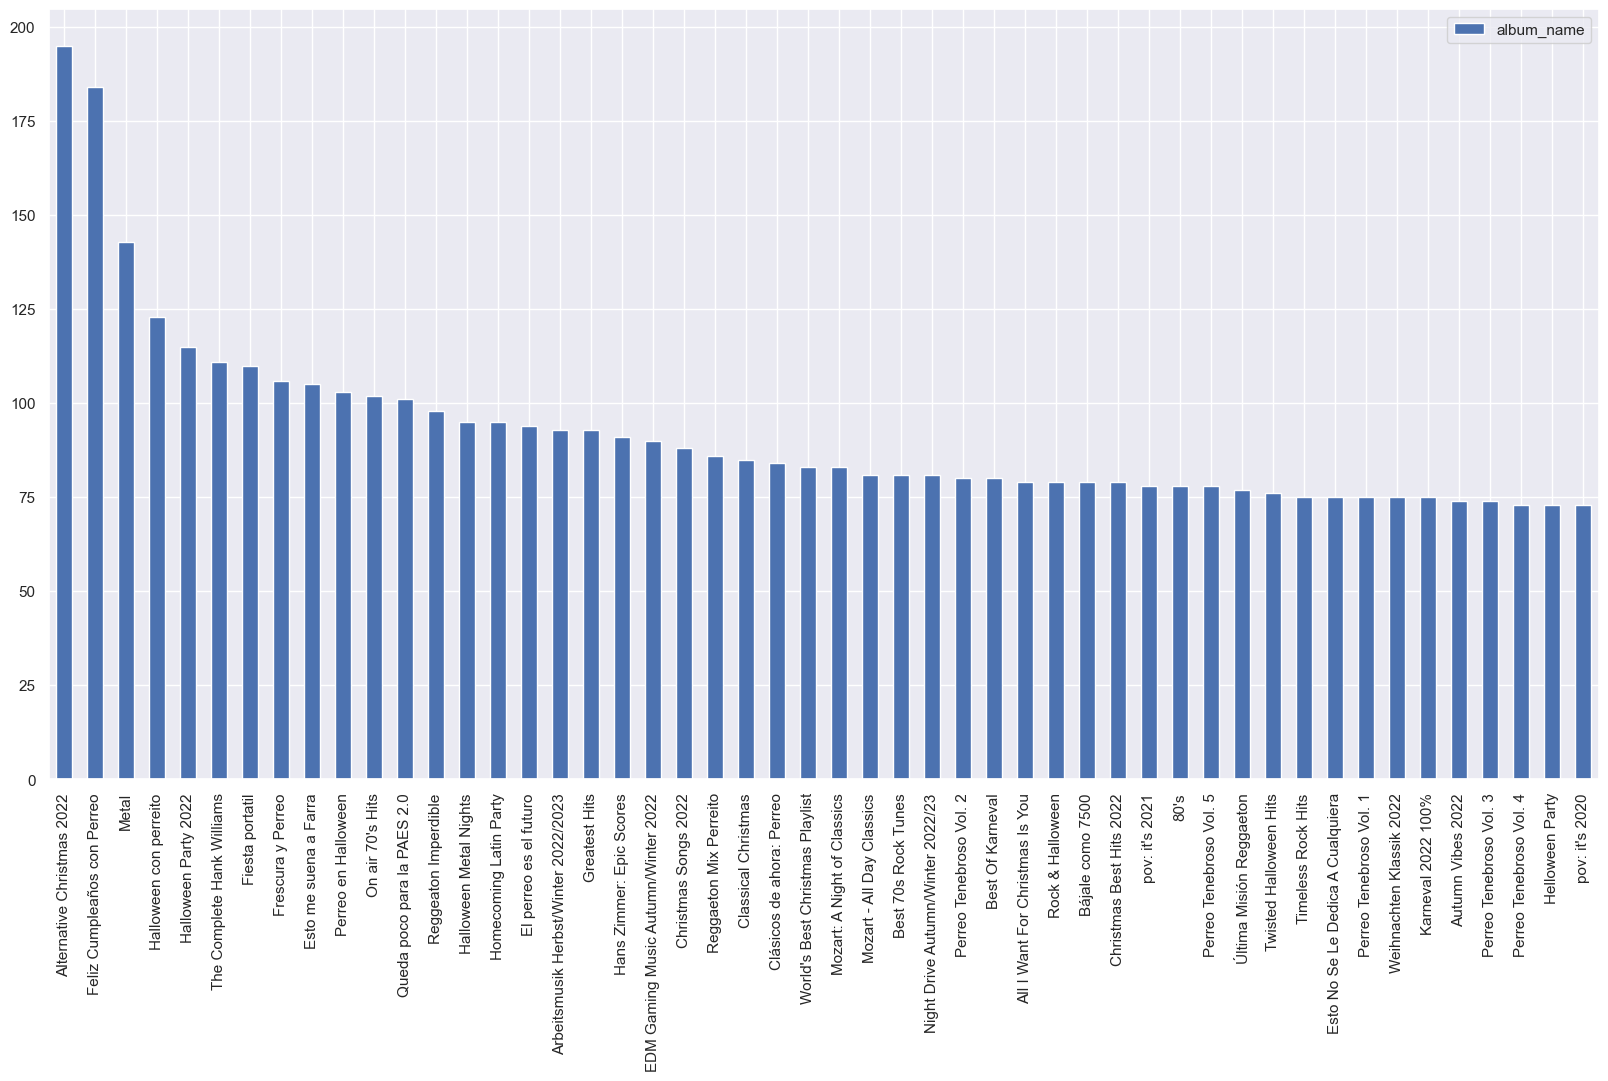

In [55]:
pd.DataFrame(tracks_df["album_name"].value_counts().nlargest(50)).plot(kind = 'bar', figsize=(20,10));

In [56]:
tracks_df["album_name"].nunique()

46589

## **_There are 46,589 different instances of album names in the dataset_**

## Histograms of tracks_df

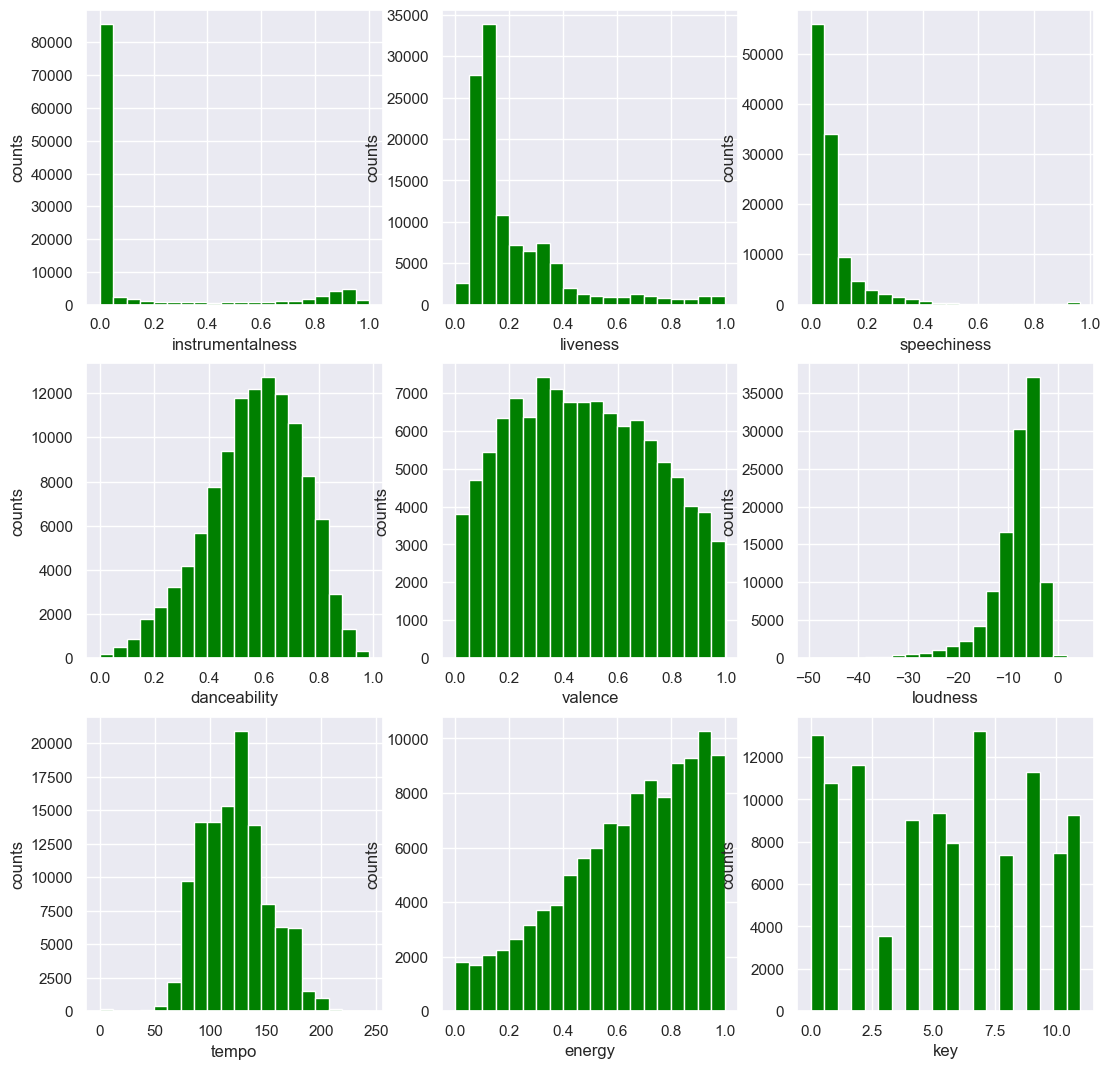

In [57]:
# Features histogram

fig = plt.figure(figsize = (13, 13))

plt.title('Histogram of all variables')

color = 'green' 

plt.subplot(331)
plt.hist(tracks_df['instrumentalness'], bins = 20, color = color)  
plt.xlabel('instrumentalness')
plt.ylabel('counts')

plt.subplot(332)
plt.hist(tracks_df['liveness'], bins = 20, color = color)  
plt.xlabel('liveness')
plt.ylabel('counts')

plt.subplot(333)
plt.hist(tracks_df['speechiness'], bins = 20, color = color)  
plt.xlabel('speechiness')
plt.ylabel('counts')

plt.subplot(334)
plt.hist(tracks_df['danceability'], bins = 20, color = color)  
plt.xlabel('danceability')
plt.ylabel('counts')

plt.subplot(335)
plt.hist(tracks_df['valence'], bins = 20, color = color)  
plt.xlabel('valence')
plt.ylabel('counts')

plt.subplot(336)
plt.hist(tracks_df['loudness'], bins = 20, color = color)  
plt.xlabel('loudness')
plt.ylabel('counts')

plt.subplot(337)
plt.hist(tracks_df['tempo'], bins = 20, color = color)  
plt.xlabel('tempo')
plt.ylabel('counts')


plt.subplot(338)
plt.hist(tracks_df['energy'], bins = 20, color = color)  
plt.xlabel('energy')
plt.ylabel('counts')

plt.subplot(339)
plt.hist(tracks_df['key'], bins = 20, color = color)  
plt.xlabel('key')
plt.ylabel('counts');
#plt.show()

## **_futher features of tracks_df_**

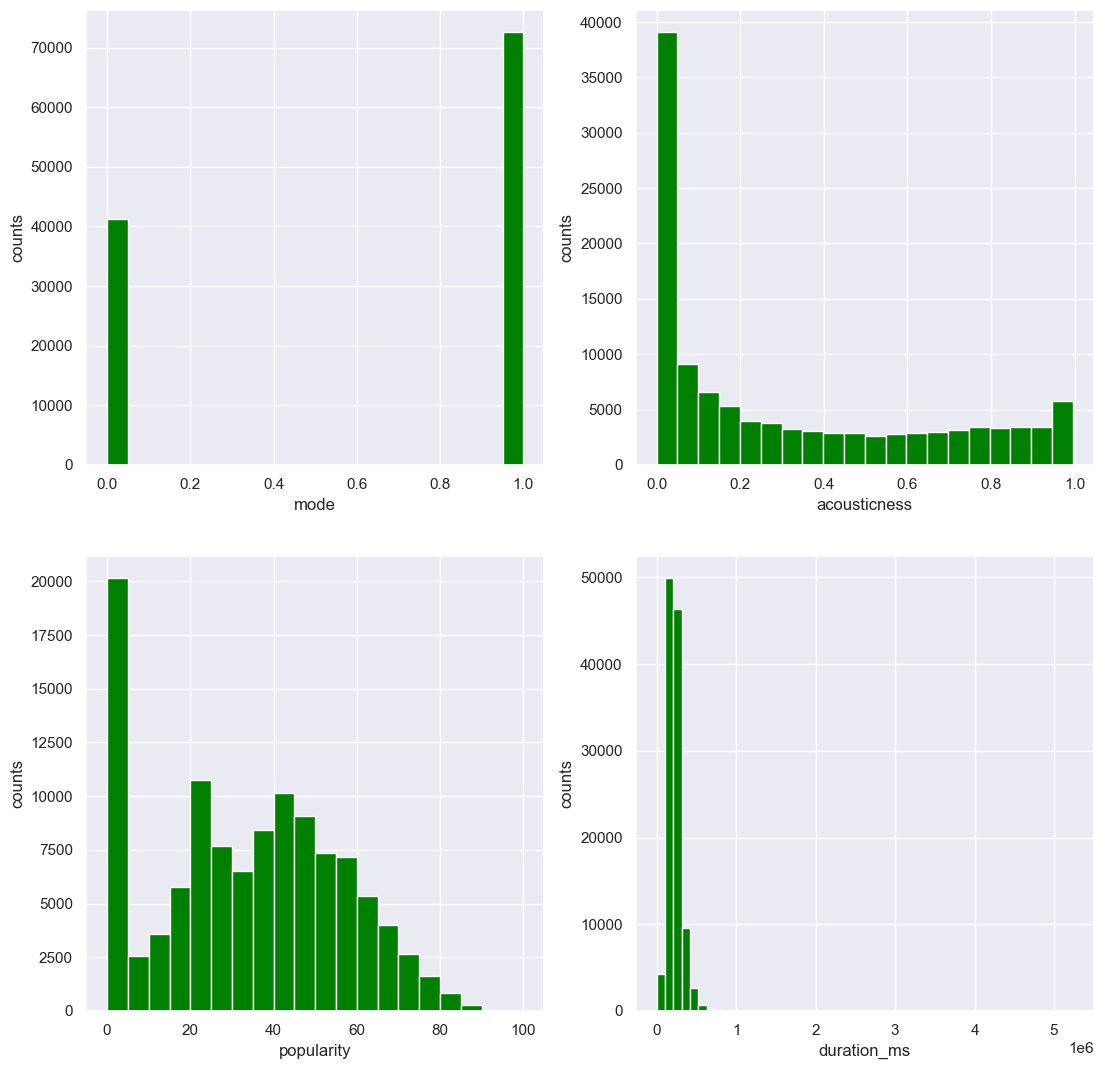

In [58]:
# more features histogram

fig = plt.figure(figsize = (13, 13))

plt.title('Histogram of all variables')

color = 'green'

plt.subplot(221)
plt.hist(tracks_df['mode'], bins = 20, color = color)  
plt.xlabel('mode')
plt.ylabel('counts')

plt.subplot(222)
plt.hist(tracks_df['acousticness'], bins = 20, color = color)  
plt.xlabel('acousticness')
plt.ylabel('counts')

plt.subplot(223)
plt.hist(tracks_df['popularity'], bins = 20, color = color)  
plt.xlabel('popularity')
plt.ylabel('counts')


plt.subplot(224)
plt.hist(tracks_df['duration_ms'], bins = 50, color = color)  
plt.xlabel('duration_ms')
plt.ylabel('counts');

## **_The histograms of sent_df (Spotify Dataset) are very similar to cont_df displaying different values such as: tempo, acousticness, liveliness, etc.Describe the values_** 

# Datasets Duplicated Values

In [59]:
# cont_df, sent_df, utht_df, tracks_df

cont_df.duplicated().sum()  #7648 duplicates

7648

In [60]:
sent_df.duplicated().sum() # 0 duplicates

0

In [61]:
utht_df.duplicated().sum()   #35530 duplicates

35530

In [62]:
tracks_df.duplicated().sum()  #450 duplicates

450

# Drop Duplicates of all datasets

In [63]:
cont_df.drop_duplicates()
utht_df.drop_duplicates()
tracks_df.drop_duplicates()

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

# Datasets Heatmaps

## **_Correlation heaptmap of cont_df_**

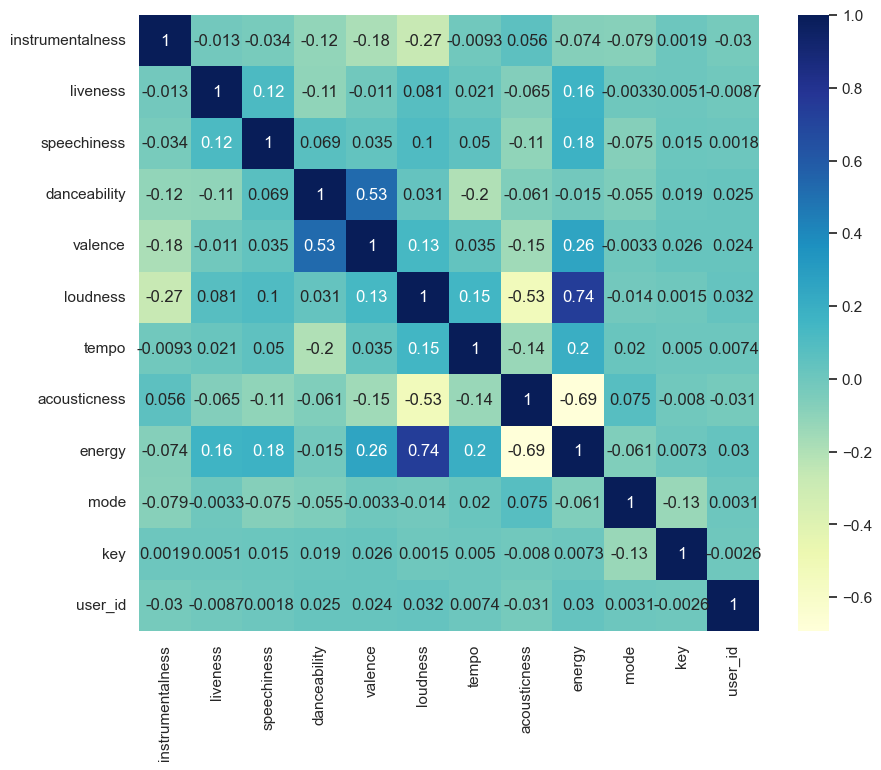

In [64]:
plt.figure(figsize=(10, 8))
cont_plot = sns.heatmap(cont_df.corr(), cmap="YlGnBu", annot=True)

## **_The only relevant correlation is energy and loudness_**

## **_Correlation heaptmap of sent_df_**

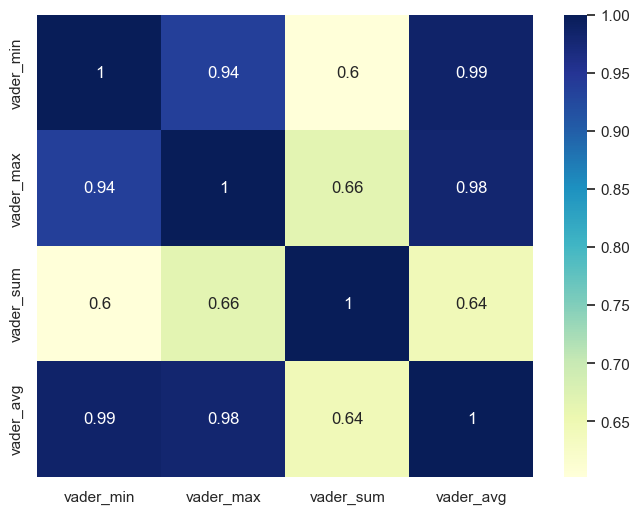

In [65]:
plt.figure(figsize=(8,6))
sent_plot = sns.heatmap(sent_df.corr(), cmap="YlGnBu", annot=True)

## **_Vader_avg, vader_max and vader_min are very highly correlated_**

## **_Correlation heaptmap of tracks_df_**

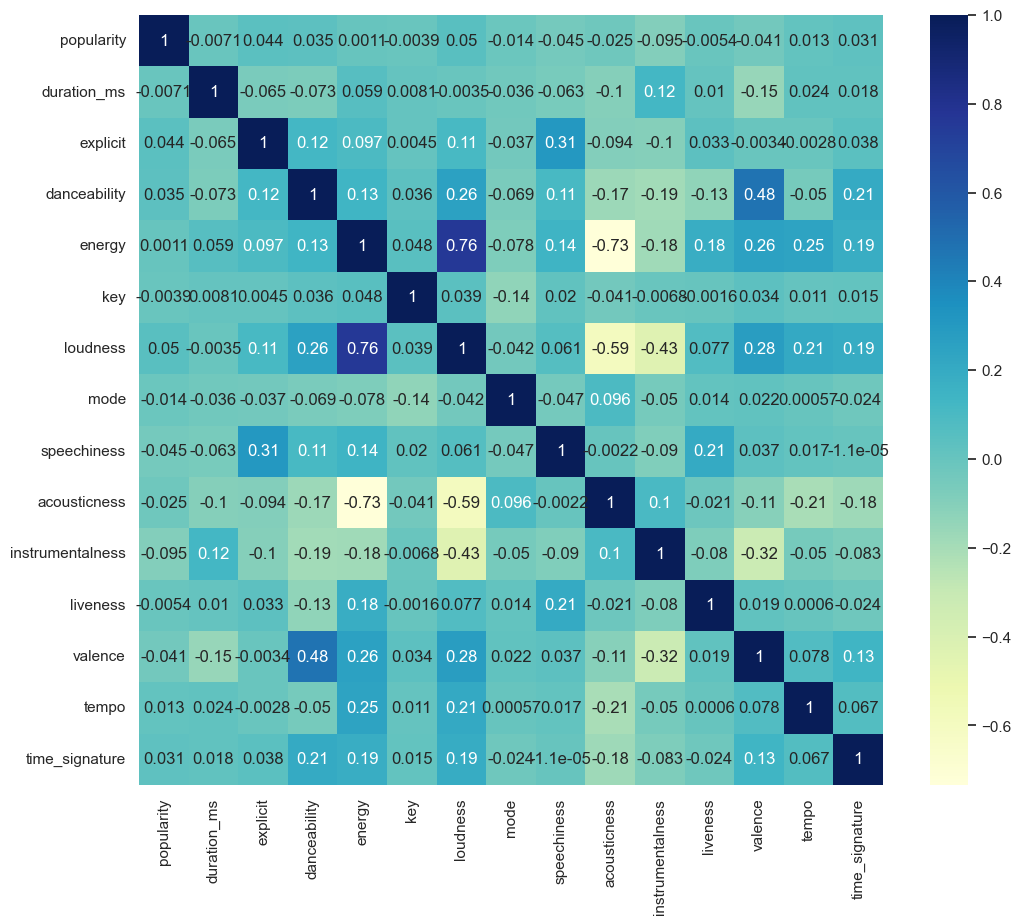

In [66]:
plt.figure(figsize=(12, 10))
tracks_plot = sns.heatmap(tracks_df.corr(), cmap="YlGnBu", annot=True)

## **_In this heatmap is also energy and louness the only relevant correlation_**

# <center> Music Recommendation 
# <center>    Merging Part II

## Databases shape

In [67]:
# Databases shape

print('cont_df shape:', cont_df.shape) #(8191310, 18)
print('sent_df shape:', sent_df.shape) #(5290, 5)
print('utht_df shape:', utht_df.shape)  #(17560113, 4) 
print('tracks_df shape:', tracks_df.shape) #(114000, 20)

cont_df shape: (8191310, 18)
sent_df shape: (5290, 5)
utht_df shape: (17560113, 4)
tracks_df shape: (114000, 20)


In [68]:
print(cont_df.info())
print(sent_df.info())
print(utht_df.info())
print(tracks_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8191310 entries, 0 to 11614670
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   instrumentalness  float64
 1   liveness          float64
 2   speechiness       float64
 3   danceability      float64
 4   valence           float64
 5   loudness          float64
 6   tempo             float64
 7   acousticness      float64
 8   energy            float64
 9   mode              float64
 10  key               float64
 11  artist_id         object 
 12  tweet_lang        object 
 13  track_id          object 
 14  created_at        object 
 15  lang              object 
 16  time_zone         object 
 17  user_id           float64
dtypes: float64(12), object(6)
memory usage: 1.2+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hashtag    5290 n

## Compare similar columns

In [69]:
# Compare columns between df_1 and df_2
common_columns_1 = cont_df.columns[cont_df.columns.isin(utht_df.columns)]

print("Common columns:", common_columns_1)

Common columns: Index(['track_id', 'created_at', 'user_id'], dtype='object')


In [70]:
# Compare columns between df_1 and df_2
common_columns_2 = cont_df.columns[cont_df.columns.isin(sent_df.columns)]

print("Common columns:", common_columns_2)

Common columns: Index([], dtype='object')


In [71]:
# Compare columns between df_1 and df_2
common_columns_3 = cont_df.columns[cont_df.columns.isin(tracks_df.columns)]

print("Common columns:", common_columns_3)

Common columns: Index(['instrumentalness', 'liveness', 'speechiness', 'danceability',
       'valence', 'loudness', 'tempo', 'acousticness', 'energy', 'mode', 'key',
       'track_id'],
      dtype='object')


In [72]:
# Compare columns between df_1 and df_2
common_columns_4 = sent_df.columns[sent_df.columns.isin(utht_df.columns)]

print("Common columns:", common_columns_4)

Common columns: Index(['hashtag'], dtype='object')


In [73]:
# Compare columns between df_1 and df_2
common_columns_5 = sent_df.columns[sent_df.columns.isin(tracks_df.columns)]

print("Common columns:", common_columns_5)

Common columns: Index([], dtype='object')


In [74]:
# Compare columns between df_1 and df_2
common_columns_6 = utht_df.columns[utht_df.columns.isin(tracks_df.columns)]

print("Common columns:", common_columns_6)

Common columns: Index(['track_id'], dtype='object')


## Merge_1

In [75]:
# Merge based on user_id, track_id, and created_at
merge_1 = pd.merge(cont_df, utht_df, on=['user_id', 'track_id', 'created_at'], how='inner')


In [76]:
# Display the merged DataFrame

merge_1.shape  #  (12508213, 19)

(12508213, 19)

In [77]:
merge_1.head()

instrumentalness  liveness  speechiness  danceability  valence  loudness  \
0           0.00479     0.180       0.0294         0.634    0.342    -8.345   
1           0.00479     0.180       0.0294         0.634    0.342    -8.345   
2           0.00479     0.180       0.0294         0.634    0.342    -8.345   
3           0.00479     0.180       0.0294         0.634    0.342    -8.345   
4           0.00000     0.086       0.0436         0.675    0.775    -4.432   

     tempo  acousticness  energy  mode  key                         artist_id  \
0  125.044       0.00035   0.697   1.0  6.0  b2980c722a1ace7a30303718ce5491d8   
1  125.044       0.00035   0.697   1.0  6.0  b2980c722a1ace7a30303718ce5491d8   
2  125.044       0.00035   0.697   1.0  6.0  b2980c722a1ace7a30303718ce5491d8   
3  125.044       0.00035   0.697   1.0  6.0  b2980c722a1ace7a30303718ce5491d8   
4   97.030       0.21700   0.885   0.0  1.0  e41273f43af504714d85465294f1f369   

  tweet_lang                          track_id           created_at lang  \
0         en  cd52b3e5b51da29e5893dba82a418a4b  2014-01-01 05:54:21   en   
1         en  cd52b3e5b51da29e5893dba82a418a4b  2014-01-01 05:54:21   en   
2         en  cd52b3e5b51da29e5893dba82a418a4b  2014-01-01 05:54:21   en   
3         en  cd52b3e5b51da29e5893dba82a418a4b  2014-01-01 05:54:21   en   
4         en  ba84d88c10fb0e42d4754a27ead10546  2014-01-01 05:54:22   es   

                     time_zone      user_id     hashtag  
0   Central Time (US & Canada)   81496937.0  nowplaying  
1   Central Time (US & Canada)   81496937.0        goth  
2   Central Time (US & Canada)   81496937.0   deathrock  
3   Central Time (US & Canada)   81496937.0    postpunk  
4  Mountain Time (US & Canada)  132588395.0  nowplaying

In [78]:
merge_1['time_zone'].isna().sum()  #0

0

In [79]:
merge_1.isna().sum().sum()   #1

1

# Merge_2

In [80]:
# Merge based on hashtag
merge_2 = pd.merge(merge_1, sent_df, on='hashtag', how='inner')

In [81]:
merge_2.shape  # (4570191, 23)

(4570191, 23)

In [82]:
merge_2.columns

Index(['instrumentalness', 'liveness', 'speechiness', 'danceability',
       'valence', 'loudness', 'tempo', 'acousticness', 'energy', 'mode', 'key',
       'artist_id', 'tweet_lang', 'track_id', 'created_at', 'lang',
       'time_zone', 'user_id', 'hashtag', 'vader_min', 'vader_max',
       'vader_sum', 'vader_avg'],
      dtype='object')

In [83]:
merge_2.head()

instrumentalness  liveness  speechiness  danceability  valence  loudness  \
0          0.004790     0.180       0.0294         0.634    0.342    -8.345   
1          0.000000     0.086       0.0436         0.675    0.775    -4.432   
2          0.000000     0.143       0.0292         0.324    0.333    -5.647   
3          0.000183     0.362       0.0524         0.767    0.808    -5.011   
4          0.000000     0.110       0.0375         0.641    0.912    -4.271   

     tempo  acousticness  energy  mode  ...                          track_id  \
0  125.044       0.00035   0.697   1.0  ...  cd52b3e5b51da29e5893dba82a418a4b   
1   97.030       0.21700   0.885   0.0  ...  ba84d88c10fb0e42d4754a27ead10546   
2   74.101       0.23900   0.574   1.0  ...  33f95122281f76e7134f9cbea3be980f   
3  114.237       0.03640   0.739   0.0  ...  b5c42e81e15cd54b9b0ee34711dedf05   
4   93.010       0.02680   0.787   1.0  ...  8bd5206b84c968eda0af8bc86d6ab1d1   

            created_at lang                    time_zone      user_id  \
0  2014-01-01 05:54:21   en   Central Time (US & Canada)   81496937.0   
1  2014-01-01 05:54:22   es  Mountain Time (US & Canada)  132588395.0   
2  2014-01-01 05:54:24   en   Eastern Time (US & Canada)   97675221.0   
3  2014-01-01 05:54:24   en   Central Time (US & Canada)   17945688.0   
4  2014-01-01 05:54:25   en   Central Time (US & Canada)  452285741.0   

      hashtag vader_min  vader_max vader_sum  vader_avg  
0  nowplaying       0.6        0.6       0.6        0.6  
1  nowplaying       0.6        0.6       0.6        0.6  
2  nowplaying       0.6        0.6       0.6        0.6  
3  nowplaying       0.6        0.6       0.6        0.6  
4  nowplaying       0.6        0.6       0.6        0.6  

[5 rows x 23 columns]

In [84]:
#The average score may be useful for identifying the overall sentiment of the tweets related to a piece of music 
#while controlling for the number of tweets. If the average sentiment score is positive, this may indicate that 
#the music is more appreciated.
merge_2= merge_2.drop(['vader_min', 'vader_max', 'vader_sum'], axis=1)
merge_2.head()

instrumentalness  liveness  speechiness  danceability  valence  loudness  \
0          0.004790     0.180       0.0294         0.634    0.342    -8.345   
1          0.000000     0.086       0.0436         0.675    0.775    -4.432   
2          0.000000     0.143       0.0292         0.324    0.333    -5.647   
3          0.000183     0.362       0.0524         0.767    0.808    -5.011   
4          0.000000     0.110       0.0375         0.641    0.912    -4.271   

     tempo  acousticness  energy  mode   key  \
0  125.044       0.00035   0.697   1.0   6.0   
1   97.030       0.21700   0.885   0.0   1.0   
2   74.101       0.23900   0.574   1.0   7.0   
3  114.237       0.03640   0.739   0.0  10.0   
4   93.010       0.02680   0.787   1.0   0.0   

                          artist_id tweet_lang  \
0  b2980c722a1ace7a30303718ce5491d8         en   
1  e41273f43af504714d85465294f1f369         en   
2  557ce373bd29743eb00a3723ab19ebe8         en   
3  77bd64b4bf77e10001fd02964985ae0f         en   
4  f965ec352eb8c0efc0af46244754942f         en   

                           track_id           created_at lang  \
0  cd52b3e5b51da29e5893dba82a418a4b  2014-01-01 05:54:21   en   
1  ba84d88c10fb0e42d4754a27ead10546  2014-01-01 05:54:22   es   
2  33f95122281f76e7134f9cbea3be980f  2014-01-01 05:54:24   en   
3  b5c42e81e15cd54b9b0ee34711dedf05  2014-01-01 05:54:24   en   
4  8bd5206b84c968eda0af8bc86d6ab1d1  2014-01-01 05:54:25   en   

                     time_zone      user_id     hashtag  vader_avg  
0   Central Time (US & Canada)   81496937.0  nowplaying        0.6  
1  Mountain Time (US & Canada)  132588395.0  nowplaying        0.6  
2   Eastern Time (US & Canada)   97675221.0  nowplaying        0.6  
3   Central Time (US & Canada)   17945688.0  nowplaying        0.6  
4   Central Time (US & Canada)  452285741.0  nowplaying        0.6

# Merge_3

In [85]:
merge_3 = pd.merge(cont_df, tracks_df, on='track_id', how='inner')

In [86]:
merge_3.shape

(0, 37)

In [87]:
merge_3.head()

Empty DataFrame
Columns: [instrumentalness_x, liveness_x, speechiness_x, danceability_x, valence_x, loudness_x, tempo_x, acousticness_x, energy_x, mode_x, key_x, artist_id, tweet_lang, track_id, created_at, lang, time_zone, user_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability_y, energy_y, key_y, loudness_y, mode_y, speechiness_y, acousticness_y, instrumentalness_y, liveness_y, valence_y, tempo_y, time_signature, track_genre]
Index: []

[0 rows x 37 columns]

## **_The third merge produces an empty database_**

# Pre-processing for merge_2 = final_merge

In [88]:
#rename the merge

final_merge = merge_2

## Creation of the Target variable

In [89]:
# we are going to create the variable "sentiment_score" which will have two values 1 and 0 to predict whether a piece of music 
#will be more or less appreciated based on "vader_avg"
final_merge['sentiment_score'] = np.where(final_merge['vader_avg']>= 0.5, 1, 0)

## Relevant languages for final_merge


[List of ISO 639-1 language codes](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)



In [90]:
#Define the most relevant languages based on the List of ISO 639-1 languages codes
final_merge = final_merge.drop(['hashtag','created_at','artist_id','tweet_lang'], axis=1)
final_merge['lang'] = final_merge['lang'].replace({'en': 'English', 'es': 'Spanish', 'ja': 'Japanese', 'pt': 'Portuguese', 'nl': 'Dutch',  'fr': 'French', 'de': 'German', 'it' : 'Italian'})

final_merge.head()

instrumentalness  liveness  speechiness  danceability  valence  loudness  \
0          0.004790     0.180       0.0294         0.634    0.342    -8.345   
1          0.000000     0.086       0.0436         0.675    0.775    -4.432   
2          0.000000     0.143       0.0292         0.324    0.333    -5.647   
3          0.000183     0.362       0.0524         0.767    0.808    -5.011   
4          0.000000     0.110       0.0375         0.641    0.912    -4.271   

     tempo  acousticness  energy  mode   key  \
0  125.044       0.00035   0.697   1.0   6.0   
1   97.030       0.21700   0.885   0.0   1.0   
2   74.101       0.23900   0.574   1.0   7.0   
3  114.237       0.03640   0.739   0.0  10.0   
4   93.010       0.02680   0.787   1.0   0.0   

                           track_id     lang                    time_zone  \
0  cd52b3e5b51da29e5893dba82a418a4b  English   Central Time (US & Canada)   
1  ba84d88c10fb0e42d4754a27ead10546  Spanish  Mountain Time (US & Canada)   
2  33f95122281f76e7134f9cbea3be980f  English   Eastern Time (US & Canada)   
3  b5c42e81e15cd54b9b0ee34711dedf05  English   Central Time (US & Canada)   
4  8bd5206b84c968eda0af8bc86d6ab1d1  English   Central Time (US & Canada)   

       user_id  vader_avg  sentiment_score  
0   81496937.0        0.6                1  
1  132588395.0        0.6                1  
2   97675221.0        0.6                1  
3   17945688.0        0.6                1  
4  452285741.0        0.6                1

In [91]:
final_merge=final_merge.join(pd.get_dummies(final_merge.lang, prefix="language"))
final_merge.head()

instrumentalness  liveness  speechiness  danceability  valence  loudness  \
0          0.004790     0.180       0.0294         0.634    0.342    -8.345   
1          0.000000     0.086       0.0436         0.675    0.775    -4.432   
2          0.000000     0.143       0.0292         0.324    0.333    -5.647   
3          0.000183     0.362       0.0524         0.767    0.808    -5.011   
4          0.000000     0.110       0.0375         0.641    0.912    -4.271   

     tempo  acousticness  energy  mode  ...  vader_avg sentiment_score  \
0  125.044       0.00035   0.697   1.0  ...        0.6               1   
1   97.030       0.21700   0.885   0.0  ...        0.6               1   
2   74.101       0.23900   0.574   1.0  ...        0.6               1   
3  114.237       0.03640   0.739   0.0  ...        0.6               1   
4   93.010       0.02680   0.787   1.0  ...        0.6               1   

  language_Dutch language_English  language_French  language_German  \
0              0                1                0                0   
1              0                0                0                0   
2              0                1                0                0   
3              0                1                0                0   
4              0                1                0                0   

   language_Italian  language_Japanese  language_Portuguese  language_Spanish  
0                 0                  0                    0                 0  
1                 0                  0                    0                 1  
2                 0                  0                    0                 0  
3                 0                  0                    0                 0  
4                 0                  0                    0                 0  

[5 rows x 25 columns]

## Drop irrelevant columns

In [92]:
final_merge= final_merge.drop(['lang'], axis=1)
final_merge.head()

instrumentalness  liveness  speechiness  danceability  valence  loudness  \
0          0.004790     0.180       0.0294         0.634    0.342    -8.345   
1          0.000000     0.086       0.0436         0.675    0.775    -4.432   
2          0.000000     0.143       0.0292         0.324    0.333    -5.647   
3          0.000183     0.362       0.0524         0.767    0.808    -5.011   
4          0.000000     0.110       0.0375         0.641    0.912    -4.271   

     tempo  acousticness  energy  mode  ...  vader_avg sentiment_score  \
0  125.044       0.00035   0.697   1.0  ...        0.6               1   
1   97.030       0.21700   0.885   0.0  ...        0.6               1   
2   74.101       0.23900   0.574   1.0  ...        0.6               1   
3  114.237       0.03640   0.739   0.0  ...        0.6               1   
4   93.010       0.02680   0.787   1.0  ...        0.6               1   

  language_Dutch  language_English  language_French  language_German  \
0              0                 1                0                0   
1              0                 0                0                0   
2              0                 1                0                0   
3              0                 1                0                0   
4              0                 1                0                0   

   language_Italian  language_Japanese  language_Portuguese  language_Spanish  
0                 0                  0                    0                 0  
1                 0                  0                    0                 1  
2                 0                  0                    0                 0  
3                 0                  0                    0                 0  
4                 0                  0                    0                 0  

[5 rows x 24 columns]

In [93]:
final_merge.shape  #(4570191, 24)

(4570191, 24)

In [94]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4570191 entries, 0 to 4570190
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   instrumentalness     float64
 1   liveness             float64
 2   speechiness          float64
 3   danceability         float64
 4   valence              float64
 5   loudness             float64
 6   tempo                float64
 7   acousticness         float64
 8   energy               float64
 9   mode                 float64
 10  key                  float64
 11  track_id             object 
 12  time_zone            object 
 13  user_id              float64
 14  vader_avg            float64
 15  sentiment_score      int32  
 16  language_Dutch       uint8  
 17  language_English     uint8  
 18  language_French      uint8  
 19  language_German      uint8  
 20  language_Italian     uint8  
 21  language_Japanese    uint8  
 22  language_Portuguese  uint8  
 23  language_Spanish     uint8  
dty

## **_At this point "hashtag" is no longer important as it is represented quantitatively by "vader_avg"_**

##  **_"created_at", "artist_id" don´t provide relevant  information_**

##  **_"tweet lang" is not relevant anymore as it is represented by "vader_avg"_**

In [95]:
#Unique time zones and cities

final_merge.time_zone.unique()

array(['Central Time (US & Canada)', 'Mountain Time (US & Canada)',
       'Eastern Time (US & Canada)', 'Quito', 'London',
       'Pacific Time (US & Canada)', 'Atlantic Time (Canada)', 'Tokyo',
       'Arizona', 'Melbourne', 'Berlin', 'Athens', 'Jakarta', 'Amsterdam',
       'Beijing', 'Brasilia', 'Sydney', 'Alaska', 'Tijuana', 'Singapore',
       'Bangkok', 'Irkutsk', 'Canberra', 'La Paz', 'Tbilisi',
       'Kuala Lumpur', 'Hawaii', 'Mexico City', 'Osaka', 'Rome',
       'Caracas', 'Budapest', 'Sapporo', 'Bogota', 'Chennai', 'Hong Kong',
       'Buenos Aires', 'Istanbul', 'Brisbane', 'Kathmandu', 'Dublin',
       'Bucharest', 'Paris', 'Seoul', 'Auckland', 'Helsinki', 'Greenland',
       'Casablanca', 'Central America', 'Prague', 'New Caledonia',
       'St. Petersburg', 'Santiago', 'Adelaide', 'Riyadh', 'Abu Dhabi',
       'Taipei', 'Mumbai', 'Vienna', 'Mid-Atlantic', 'Copenhagen',
       'Bratislava', 'Islamabad', 'Brussels', 'Madrid', 'Baghdad',
       'Moscow', 'Stockholm', 'Mont

## Most relevant TIme Zones and cities

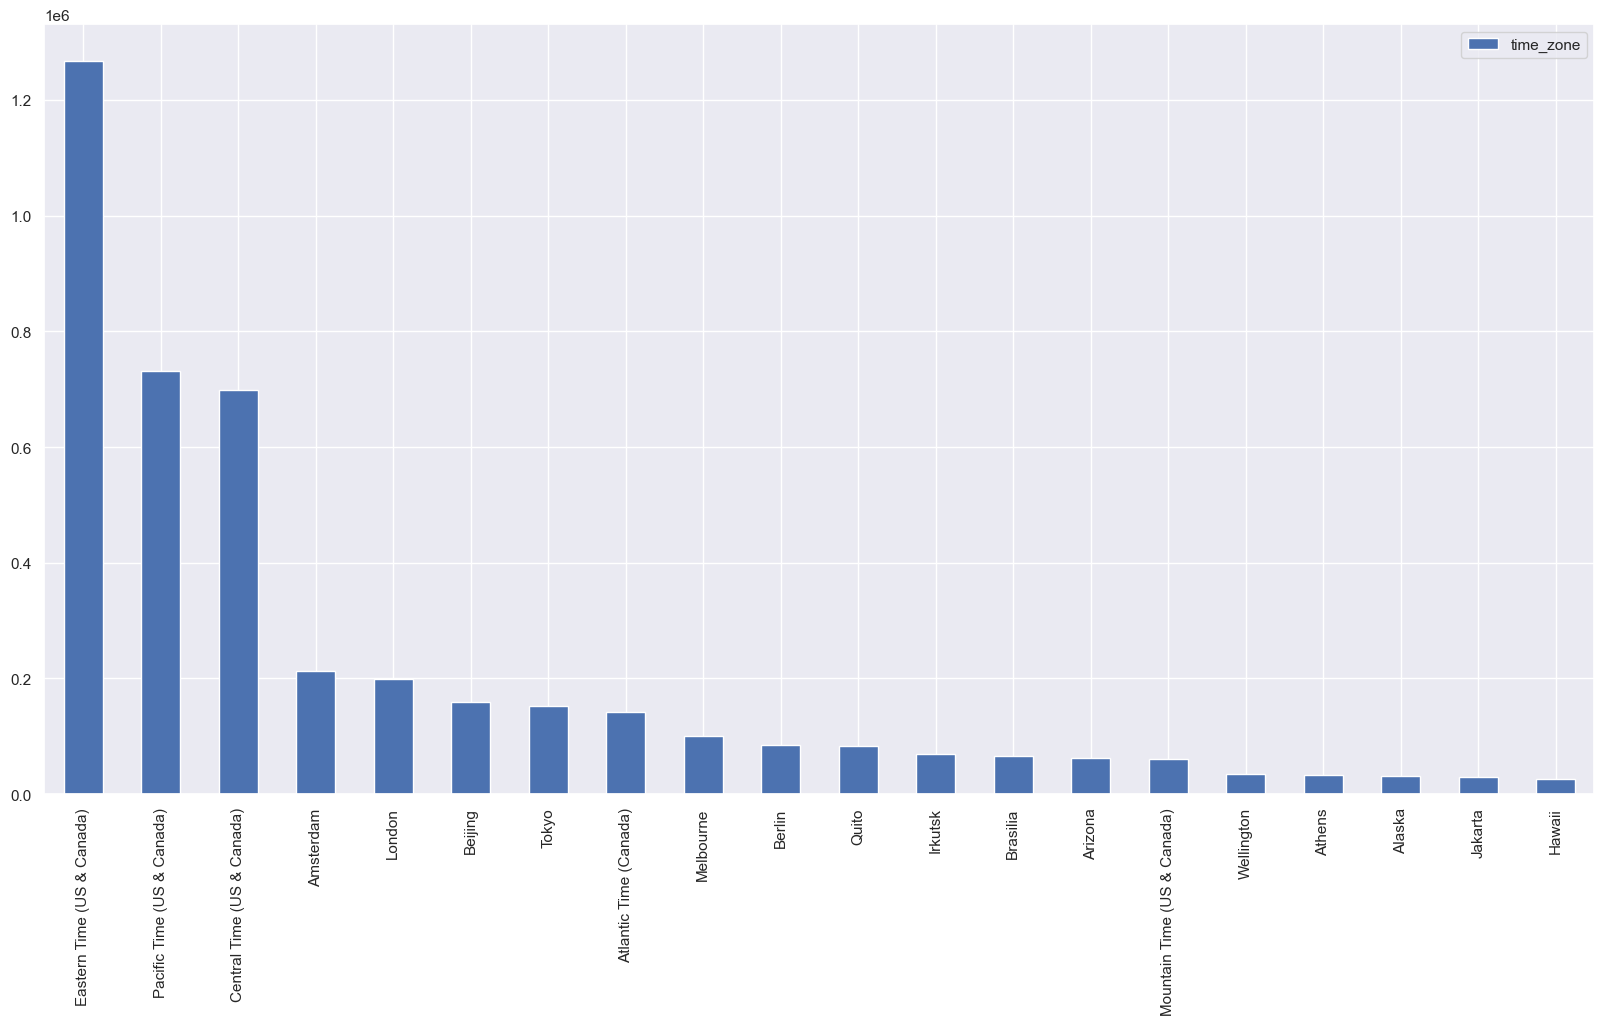

In [96]:
#Most relevant time zones

pd.DataFrame(final_merge['time_zone'].value_counts().nlargest(20)).plot(kind = 'bar', figsize=(20,10));

In [97]:
pd.DataFrame(final_merge['time_zone'].value_counts().nlargest(40))

time_zone
Eastern Time (US & Canada)     1267601
Pacific Time (US & Canada)      731288
Central Time (US & Canada)      698872
Amsterdam                       212619
London                          199242
Beijing                         159909
Tokyo                           151688
Atlantic Time (Canada)          141552
Melbourne                        99851
Berlin                           85097
Quito                            83658
Irkutsk                          69305
Brasilia                         65573
Arizona                          61745
Mountain Time (US & Canada)      60883
Wellington                       35492
Athens                           33360
Alaska                           31068
Jakarta                          29743
Hawaii                           27082
Mexico City                      22887
Edinburgh                        20223
Paris                            18160
Singapore                        16416
Bangkok                          15197
Osaka                            14929
Kuala Lumpur                     14140
Istanbul                         14131
Santiago                         13463
Canberra                         12797
Rome                             11225
Abu Dhabi                        10994
Sydney                           10618
Vienna                           10197
Hong Kong                         9595
Buenos Aires                      6913
Monterrey                         6548
Copenhagen                        6457
Dublin                            6355
Caracas                           5959

In [98]:
value_counts = final_merge['time_zone'].value_counts()[40:100]

# Print the sliced value counts
print(value_counts)

Madrid                          5720
America/New_York                5655
Greenland                       4825
Casablanca                      4461
Seoul                           3969
Ljubljana                       3398
Perth                           3240
Chennai                         2934
Australia/Sydney                2848
La Paz                          2837
New Delhi                       2595
Sapporo                         2492
Tbilisi                         2312
Lisbon                          1896
Monrovia                        1856
Stockholm                       1781
Moscow                          1520
Urumqi                          1375
Sri Jayawardenepura             1312
Bogota                          1304
Bern                            1222
Auckland                        1185
Karachi                          961
Lima                             957
West Central Africa              932
Central America                  791
Brussels                         738
P

## **_Time Zones grouping and rename: All time zones with >1000 entries were selected_**

In [99]:
#Rename the values with UTC Time Zones

#>600000  huge data related to North America not specific city
final_merge['time_zone'].replace('Eastern Time (US & Canada)', 'UTC -5',inplace=True)
final_merge['time_zone'].replace('Pacific Time (US & Canada)', 'UTC -8',inplace=True)
final_merge['time_zone'].replace('Central Time (US & Canada)', 'UTC -6',inplace=True)



#<200000
final_merge['time_zone'].replace('Amsterdam', 'UTC +1',inplace=True)
final_merge['time_zone'].replace('London', 'UTC +0',inplace=True)
final_merge['time_zone'].replace('Beijing', 'UTC +8',inplace=True)
final_merge['time_zone'].replace('Tokyo', 'UTC +9',inplace=True)
final_merge['time_zone'].replace('Atlantic Time (Canada)', 'UTC -4',inplace=True)



#<100000
final_merge['time_zone'].replace('Melbourne', 'UTC +10',inplace=True)
final_merge['time_zone'].replace('Berlin', 'UTC +1',inplace=True)
final_merge['time_zone'].replace('Quito', 'UTC -5',inplace=True)
final_merge['time_zone'].replace('Irkutsk', 'UTC +8',inplace=True)
final_merge['time_zone'].replace('Brasilia', 'UTC -3',inplace=True)
final_merge['time_zone'].replace('Arizona', 'UTC -7',inplace=True)                                 
final_merge['time_zone'].replace('Mountain Time (US & Canada)', 'UTC -7',inplace=True)                                 
   


#>20000
final_merge['time_zone'].replace('Wellington', 'UTC +12',inplace=True) 
final_merge['time_zone'].replace('Athens', 'UTC +2',inplace=True)
final_merge['time_zone'].replace('Alaska', 'UTC -10',inplace=True)
final_merge['time_zone'].replace('Jakarta', 'UTC +7',inplace=True)
final_merge['time_zone'].replace('Hawaii', 'UTC -10',inplace=True)
final_merge['time_zone'].replace('Mexico City', 'UTC -6',inplace=True)
final_merge['time_zone'].replace('Edinburgh', 'UTC +0',inplace=True)


#<20000
final_merge['time_zone'].replace('Paris', 'UTC +1',inplace=True)
final_merge['time_zone'].replace('Singapore', 'UTC +8',inplace=True)
final_merge['time_zone'].replace('Bangkok', 'UTC +7',inplace=True)
final_merge['time_zone'].replace('Osaka', 'UTC +9',inplace=True)                                 
final_merge['time_zone'].replace('Kuala Lumpur', 'UTC +8',inplace=True)   
final_merge['time_zone'].replace('Istanbul', 'UTC +3',inplace=True)
final_merge['time_zone'].replace('Santiago', 'UTC -4',inplace=True)
final_merge['time_zone'].replace('Rome', 'UTC +1',inplace=True)
final_merge['time_zone'].replace('Canberra', 'UTC +10',inplace=True)
final_merge['time_zone'].replace('Abu Dhabi', 'UTC +4',inplace=True)
final_merge['time_zone'].replace('Sydney', 'UTC +10',inplace=True)
final_merge['time_zone'].replace('Vienna', 'UTC +1 ',inplace=True)


#<10000
final_merge['time_zone'].replace('Hong Kong', 'UTC +8',inplace=True)
final_merge['time_zone'].replace('Buenos Aires', 'UTC -3',inplace=True)
final_merge['time_zone'].replace('Monterrey', 'UTC -6',inplace=True)
final_merge['time_zone'].replace('Copenhagen', 'UTC +1',inplace=True)
final_merge['time_zone'].replace('Dublin', 'UTC +0',inplace=True)



#<6000

final_merge['time_zone'].replace('Caracas', 'UTC -4',inplace=True)
final_merge['time_zone'].replace('Madrid', 'UTC +1',inplace=True)
final_merge['time_zone'].replace('America/New_York', 'UTC -5',inplace=True)


# <5000

final_merge['time_zone'].replace('Greenland', 'UTC -2',inplace=True)
final_merge['time_zone'].replace('Casablanca', 'UTC +1',inplace=True)



#<4000

final_merge['time_zone'].replace('Seoul', 'UTC +9',inplace=True)
final_merge['time_zone'].replace('Ljubljana', 'UTC +1',inplace=True)
final_merge['time_zone'].replace('Perth', 'UTC +8',inplace=True)

#<3000

final_merge['time_zone'].replace('Chennai', 'UTC +5',inplace=True)
final_merge['time_zone'].replace('Australia/Sydney', 'UTC +10',inplace=True)
final_merge['time_zone'].replace('La Paz', 'UTC -4',inplace=True)
final_merge['time_zone'].replace('New Dehli', 'UTC +5',inplace=True)
final_merge['time_zone'].replace('Sapporo', 'UTC +9',inplace=True)
final_merge['time_zone'].replace('Tbilisi', 'UTC +4',inplace=True)


#<2000 &  >1000

final_merge['time_zone'].replace('Lisbon', 'UTC +0',inplace=True)
final_merge['time_zone'].replace('Monrovia', 'UTC -1',inplace=True)
final_merge['time_zone'].replace('Stockholm', 'UTC +1',inplace=True)
final_merge['time_zone'].replace('Moscow', 'UTC +3',inplace=True)
final_merge['time_zone'].replace('Urumqui', 'UTC +8 ',inplace=True)
final_merge['time_zone'].replace('Sri Jayawardenepura', 'UTC +5',inplace=True)
final_merge['time_zone'].replace('Bogota', 'UTC -5',inplace=True)
final_merge['time_zone'].replace('Bern', 'UTC +1',inplace=True)
final_merge['time_zone'].replace('Auckland', 'UTC +12',inplace=True)




                                                             

#final_merge['time_zone'].replace('Karachi', 'UTC +5 ',inplace=True)
#final_merge['time_zone'].replace('Lima', 'UTC -5',inplace=True)
#final_merge['time_zone'].replace('Pacific/Honolulu', 'UTC -10',inplace=True)
#final_merge['time_zone'].replace('America/Denver', 'UTC -7',inplace=True)
#final_merge['time_zone'].replace('America/Los_Angeles', 'UTC -8',inplace=True)
#final_merge['time_zone'].replace('America/Chicago', 'UTC -6',inplace=True)
#final_merge['time_zone'].replace('America/New_York', 'UTC -5',inplace=True)
#final_merge['time_zone'].replace('America/Halifax', 'UTC -5',inplace=True)
#final_merge['time_zone'].replace('America/Detroit', 'UTC -5',inplace=True)
#final_merge['time_zone'].replace('America/Dawson', 'UTC -7',inplace=True)
#final_merge['time_zone'].replace('America/Phoenix', 'UTC -7',inplace=True)






## **_Calculated Time zones:_** 


[Time Zone Map: www.timeanddate.com ](https://www.timeanddate.com/time/map/#!cities=16,136,33,248,152,37,190,378,45,197,264,26,108,103,155,304,195,236,28,122,107,232,215,57,2,240,259,102,51,69,78,58,141,179,60,235,736,196,553,124,176,371,133,161,162,622,671,239,166,1925,41,270,22,655)

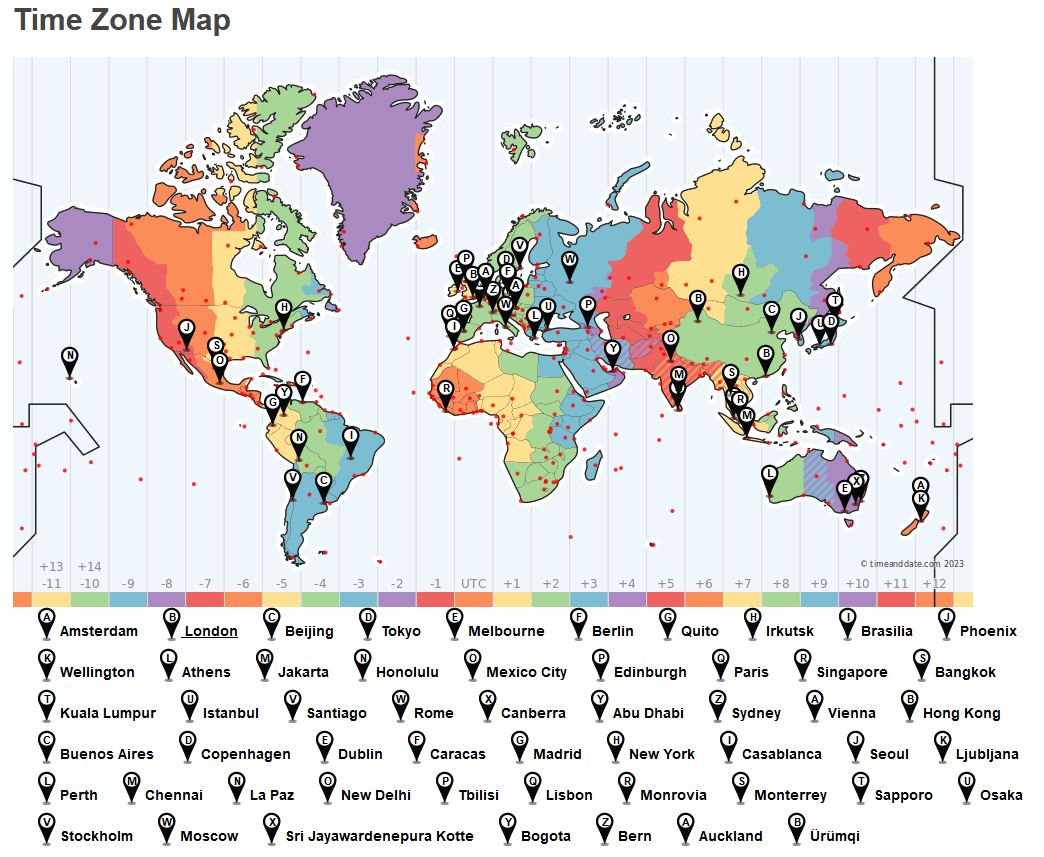

In [100]:
#Convert the names of the cities to the UTC based on the TIme Zone Map

final_merge = final_merge.loc[~(
                        (final_merge['time_zone'] != 'UTC -10') &
                        (final_merge['time_zone'] != 'UTC -9') &
                        (final_merge['time_zone'] != 'UTC -8') &
                        (final_merge['time_zone'] != 'UTC -7') &
                        (final_merge['time_zone'] != 'UTC -6') &
                        (final_merge['time_zone'] != 'UTC -5') &
                        (final_merge['time_zone'] != 'UTC -4') &
                        (final_merge['time_zone'] != 'UTC -3') &
                        (final_merge['time_zone'] != 'UTC -2') &
                        (final_merge['time_zone'] != 'UTC -1') &
                        (final_merge['time_zone'] != 'UTC +0') &
                        (final_merge['time_zone'] != 'UTC +1') &
                        (final_merge['time_zone'] != 'UTC +2') &
                        (final_merge['time_zone'] != 'UTC +3') &
                        (final_merge['time_zone'] != 'UTC +4') &
                        (final_merge['time_zone'] != 'UTC +5') &
                        (final_merge['time_zone'] != 'UTC +6') &
                        (final_merge['time_zone'] != 'UTC +7') &
                        (final_merge['time_zone'] != 'UTC +8') &
                        (final_merge['time_zone'] != 'UTC +9') &
                        (final_merge['time_zone'] != 'UTC +10') &
                        (final_merge['time_zone'] != 'UTC +11') &
                        (final_merge['time_zone'] != 'UTC +12') &
                        (final_merge['time_zone'] != 'UTC +13')),:]

In [101]:
#Value counts of the different UTC Time Zones

value_counts = final_merge['time_zone'].value_counts()
print(value_counts)

UTC -5     1358218
UTC -8      731288
UTC -6      728307
UTC +1      350140
UTC +8      272605
UTC +0      227716
UTC +9      173078
UTC -4      163811
UTC +10     126114
UTC -7      122628
UTC -3       72486
UTC -10      58150
UTC +7       44940
UTC +12      36677
UTC +2       33360
UTC +3       15651
UTC +4       13306
UTC -2        4825
UTC +5        4246
UTC -1        1856
Name: time_zone, dtype: int64


In [102]:
value_counts = final_merge['time_zone'].value_counts().sum()
print(value_counts)  #4539402  

4539402


In [103]:
len(final_merge)  #4539402 

4539402

In [104]:
# Group the time zones into continents

utc_to_continent = {

    'UTC -10': 'North America',
    'UTC -9': 'North America',
    'UTC -8': 'North America',
    'UTC -7': 'North America',
    'UTC -6': 'North America & Central America',
    'UTC -5': 'North America & South America',
    'UTC -4': 'North America & South America',
    'UTC -3': 'North America & South America',
    'UTC -2': 'Atlantic',
    'UTC -1': 'Africa',
    'UTC +0': 'Europe',
    'UTC +1': 'Europe',
    'UTC +2': 'Europe',
    'UTC +3': 'Middle East',
    'UTC +4': 'Middle East',
    'UTC +5': 'Asia',
    'UTC +6': 'Asia',
    'UTC +7': 'Asia',
    'UTC +8': 'Asia & Australia',
    'UTC +9': 'Asia & Australia',
    'UTC +10': 'Asia & Australia',
    'UTC +11': 'Pacific',
    'UTC +12': 'Pacific',
    'UTC +13': 'Pacific'
}


In [105]:
final_merge['continent_zone'] = final_merge['time_zone'].map(utc_to_continent)

In [106]:
pd.DataFrame(final_merge['continent_zone'].value_counts().nlargest(20))

continent_zone
North America & South America           1594515
North America                            912066
North America & Central America          728307
Europe                                   611216
Asia & Australia                         571797
Asia                                      49186
Pacific                                   36677
Middle East                               28957
Atlantic                                   4825
Africa                                     1856

In [107]:
final_merge['continent_zone'].value_counts().sum()   ##4539402 

4539402

## Continents

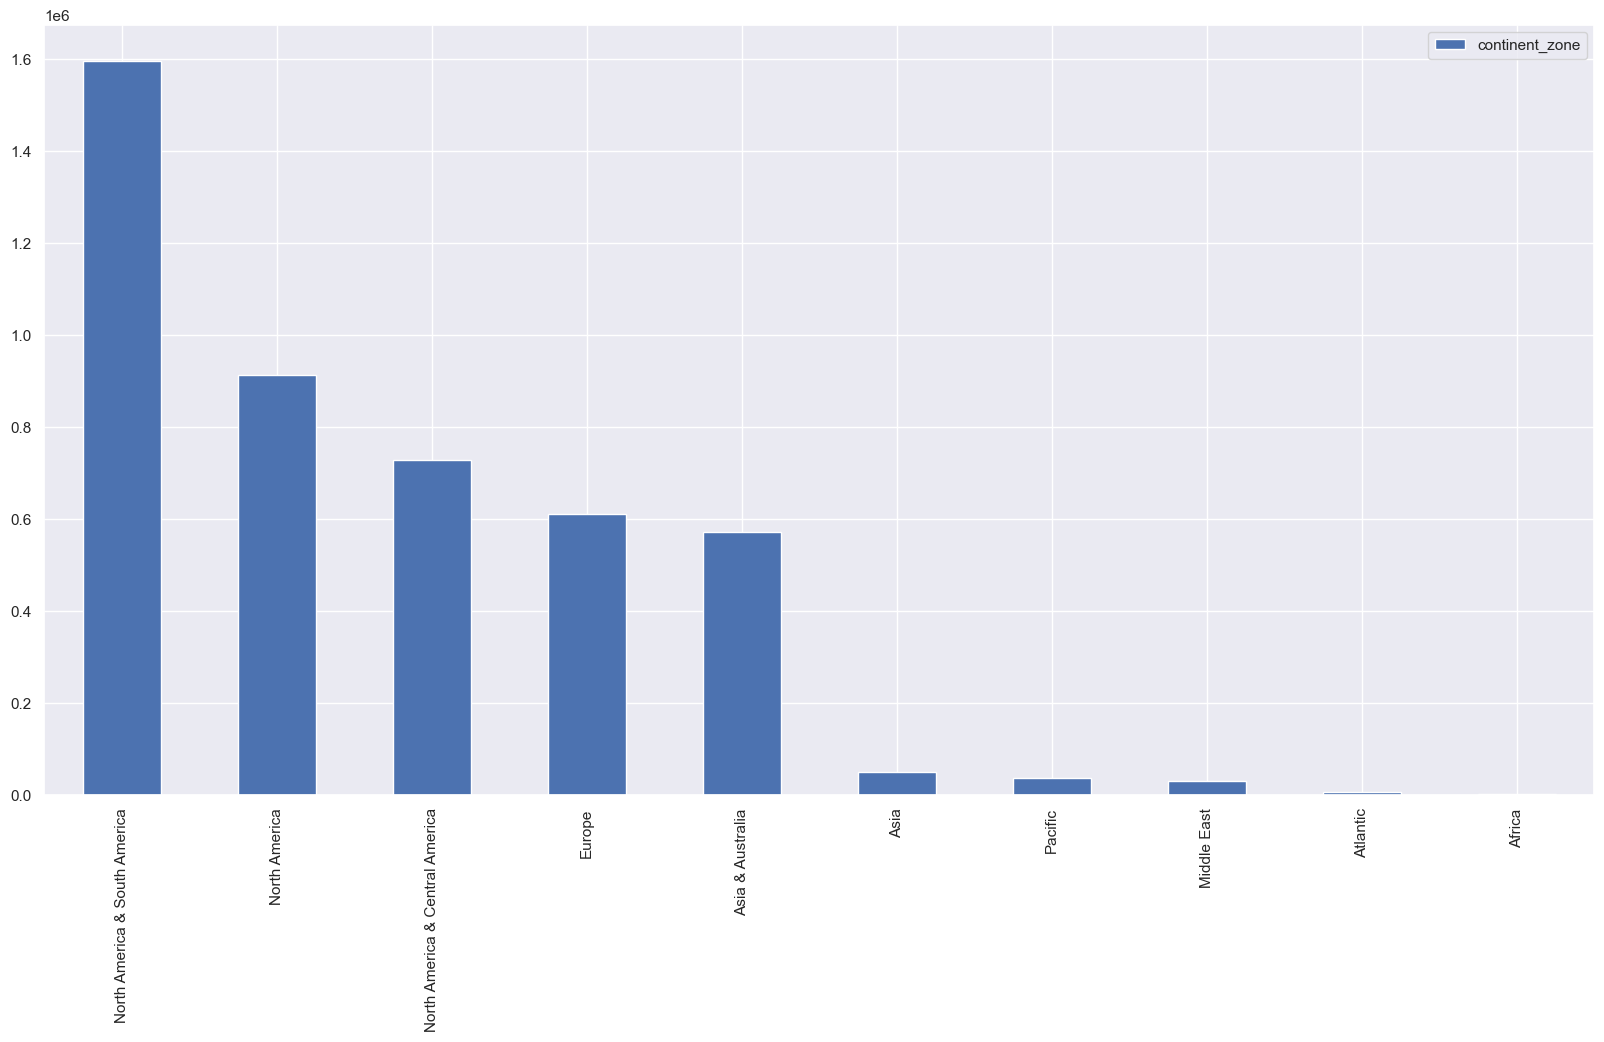

In [108]:
pd.DataFrame(final_merge['continent_zone'].value_counts().nlargest(20)).plot(kind = 'bar', figsize=(20,10));

In [109]:
#Creation of dummy variables
final_merge=final_merge.join(pd.get_dummies(final_merge.continent_zone, prefix="tz"))
final_merge.head()

instrumentalness  liveness  speechiness  danceability  valence  loudness  \
0          0.004790     0.180       0.0294         0.634    0.342    -8.345   
1          0.000000     0.086       0.0436         0.675    0.775    -4.432   
2          0.000000     0.143       0.0292         0.324    0.333    -5.647   
3          0.000183     0.362       0.0524         0.767    0.808    -5.011   
4          0.000000     0.110       0.0375         0.641    0.912    -4.271   

     tempo  acousticness  energy  mode  ...  tz_Africa tz_Asia  \
0  125.044       0.00035   0.697   1.0  ...          0       0   
1   97.030       0.21700   0.885   0.0  ...          0       0   
2   74.101       0.23900   0.574   1.0  ...          0       0   
3  114.237       0.03640   0.739   0.0  ...          0       0   
4   93.010       0.02680   0.787   1.0  ...          0       0   

  tz_Asia & Australia  tz_Atlantic  tz_Europe  tz_Middle East  \
0                   0            0          0               0   
1                   0            0          0               0   
2                   0            0          0               0   
3                   0            0          0               0   
4                   0            0          0               0   

   tz_North America  tz_North America & Central America  \
0                 0                                   1   
1                 1                                   0   
2                 0                                   0   
3                 0                                   1   
4                 0                                   1   

   tz_North America & South America  tz_Pacific  
0                                 0           0  
1                                 0           0  
2                                 1           0  
3                                 0           0  
4                                 0           0  

[5 rows x 35 columns]

## **_Drop of irrelevant columns_**

In [110]:
final_merge= final_merge.drop(["time_zone", 'continent_zone'], axis=1)
final_merge.head()

instrumentalness  liveness  speechiness  danceability  valence  loudness  \
0          0.004790     0.180       0.0294         0.634    0.342    -8.345   
1          0.000000     0.086       0.0436         0.675    0.775    -4.432   
2          0.000000     0.143       0.0292         0.324    0.333    -5.647   
3          0.000183     0.362       0.0524         0.767    0.808    -5.011   
4          0.000000     0.110       0.0375         0.641    0.912    -4.271   

     tempo  acousticness  energy  mode  ...  tz_Africa tz_Asia  \
0  125.044       0.00035   0.697   1.0  ...          0       0   
1   97.030       0.21700   0.885   0.0  ...          0       0   
2   74.101       0.23900   0.574   1.0  ...          0       0   
3  114.237       0.03640   0.739   0.0  ...          0       0   
4   93.010       0.02680   0.787   1.0  ...          0       0   

   tz_Asia & Australia  tz_Atlantic  tz_Europe  tz_Middle East  \
0                    0            0          0               0   
1                    0            0          0               0   
2                    0            0          0               0   
3                    0            0          0               0   
4                    0            0          0               0   

   tz_North America  tz_North America & Central America  \
0                 0                                   1   
1                 1                                   0   
2                 0                                   0   
3                 0                                   1   
4                 0                                   1   

   tz_North America & South America  tz_Pacific  
0                                 0           0  
1                                 0           0  
2                                 1           0  
3                                 0           0  
4                                 0           0  

[5 rows x 33 columns]

In [111]:
final_merge.columns

Index(['instrumentalness', 'liveness', 'speechiness', 'danceability',
       'valence', 'loudness', 'tempo', 'acousticness', 'energy', 'mode', 'key',
       'track_id', 'user_id', 'vader_avg', 'sentiment_score', 'language_Dutch',
       'language_English', 'language_French', 'language_German',
       'language_Italian', 'language_Japanese', 'language_Portuguese',
       'language_Spanish', 'tz_Africa', 'tz_Asia', 'tz_Asia & Australia',
       'tz_Atlantic', 'tz_Europe', 'tz_Middle East', 'tz_North America',
       'tz_North America & Central America',
       'tz_North America & South America', 'tz_Pacific'],
      dtype='object')

In [112]:
final_merge.duplicated().sum() #  3825514

3825514

In [113]:
final_merge.shape #(4539402, 33)

(4539402, 33)

In [114]:
final_merge.drop_duplicates(inplace=True)  

In [115]:
final_merge.duplicated().sum()

0

In [116]:
print(final_merge.shape)
final_merge.columns    #shape  (713888, 33) 

(713888, 33)


Index(['instrumentalness', 'liveness', 'speechiness', 'danceability',
       'valence', 'loudness', 'tempo', 'acousticness', 'energy', 'mode', 'key',
       'track_id', 'user_id', 'vader_avg', 'sentiment_score', 'language_Dutch',
       'language_English', 'language_French', 'language_German',
       'language_Italian', 'language_Japanese', 'language_Portuguese',
       'language_Spanish', 'tz_Africa', 'tz_Asia', 'tz_Asia & Australia',
       'tz_Atlantic', 'tz_Europe', 'tz_Middle East', 'tz_North America',
       'tz_North America & Central America',
       'tz_North America & South America', 'tz_Pacific'],
      dtype='object')

In [117]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713888 entries, 0 to 4570189
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   instrumentalness                    713888 non-null  float64
 1   liveness                            713888 non-null  float64
 2   speechiness                         713888 non-null  float64
 3   danceability                        713888 non-null  float64
 4   valence                             713888 non-null  float64
 5   loudness                            713888 non-null  float64
 6   tempo                               713888 non-null  float64
 7   acousticness                        713888 non-null  float64
 8   energy                              713888 non-null  float64
 9   mode                                713888 non-null  float64
 10  key                                 713888 non-null  float64
 11  track_id                 

## Lenght database final_merge

In [118]:
len(final_merge)  #713888

713888

# Calculations before the classification

## Drop unused values

In [119]:
#User_id is not necessary
#track_id is not necessary
#vader_avg is not necessary we transform it in the sentiment score

final_merge.drop(columns=['user_id', 'track_id', 'vader_avg' ], axis = 1, inplace = True)

In [120]:
final_merge.head()

instrumentalness  liveness  speechiness  danceability  valence  loudness  \
0          0.004790     0.180       0.0294         0.634    0.342    -8.345   
1          0.000000     0.086       0.0436         0.675    0.775    -4.432   
2          0.000000     0.143       0.0292         0.324    0.333    -5.647   
3          0.000183     0.362       0.0524         0.767    0.808    -5.011   
4          0.000000     0.110       0.0375         0.641    0.912    -4.271   

     tempo  acousticness  energy  mode  ...  tz_Africa  tz_Asia  \
0  125.044       0.00035   0.697   1.0  ...          0        0   
1   97.030       0.21700   0.885   0.0  ...          0        0   
2   74.101       0.23900   0.574   1.0  ...          0        0   
3  114.237       0.03640   0.739   0.0  ...          0        0   
4   93.010       0.02680   0.787   1.0  ...          0        0   

   tz_Asia & Australia  tz_Atlantic  tz_Europe  tz_Middle East  \
0                    0            0          0               0   
1                    0            0          0               0   
2                    0            0          0               0   
3                    0            0          0               0   
4                    0            0          0               0   

   tz_North America  tz_North America & Central America  \
0                 0                                   1   
1                 1                                   0   
2                 0                                   0   
3                 0                                   1   
4                 0                                   1   

   tz_North America & South America  tz_Pacific  
0                                 0           0  
1                                 0           0  
2                                 1           0  
3                                 0           0  
4                                 0           0  

[5 rows x 30 columns]

# Definition of Data and Target

In [121]:
target = final_merge['sentiment_score'] 
data = final_merge.drop('sentiment_score', axis = 1)

In [122]:
target.value_counts(normalize=True)  #highly imbalanced

1    0.957561
0    0.042439
Name: sentiment_score, dtype: float64

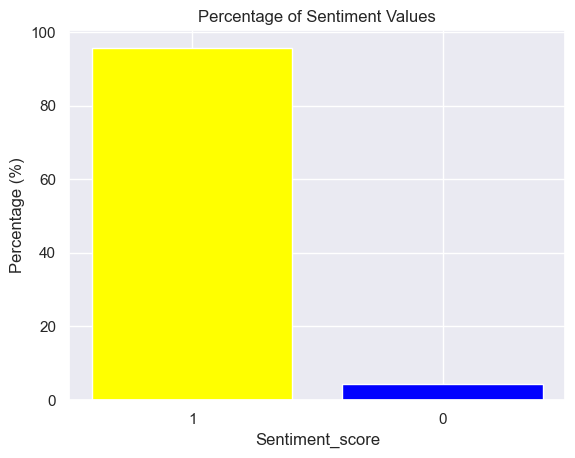

In [123]:
#Plot the imbalance of the target variable

percentage_1 = (final_merge['sentiment_score'].value_counts(normalize=True)[1] * 100).round(2)
percentage_0 = (final_merge['sentiment_score'].value_counts(normalize=True)[0] * 100).round(2)

labels = ['1', '0']
values = [percentage_1, percentage_0]
colors = ['yellow', 'blue']

plt.bar(labels, values, color=colors)

plt.xlabel('Sentiment_score')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Sentiment Values')

plt.show()

In [124]:
len(final_merge)  #713888

713888

In [125]:
final_merge.isna().sum()

instrumentalness                      0
liveness                              0
speechiness                           0
danceability                          0
valence                               0
loudness                              0
tempo                                 0
acousticness                          0
energy                                0
mode                                  0
key                                   0
sentiment_score                       0
language_Dutch                        0
language_English                      0
language_French                       0
language_German                       0
language_Italian                      0
language_Japanese                     0
language_Portuguese                   0
language_Spanish                      0
tz_Africa                             0
tz_Asia                               0
tz_Asia & Australia                   0
tz_Atlantic                           0
tz_Europe                             0


## Create the Database final_merge

In [126]:
#Create a csv file of the database

#final_merge.to_csv('final_merge.csv', index=False)


# <center> Music Recommendation
# <center> ML Classification Part III 

In [1]:
#import relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from time import time

In [2]:
#if necessary load the final_merge database
#final_merge = pd.read_csv('final_merge.csv')

# Splitting the dataset

In [3]:
# Splitting of the final_merge database into features and target

X = final_merge.drop(columns=['sentiment_score'])
y = final_merge['sentiment_score']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Resampling the dataset

In [4]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


# First strategy. At the end we decided to use SMOTE
#under_sampler = RandomUnderSampler(sampling_strategy='auto')
#over_sampler = RandomOverSampler(sampling_strategy='auto')


#SMOTE calculation
smote = SMOTE(sampling_strategy='auto')

# Apply SMOTE train data 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply SMOTE to test data
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)


## **_The resampling took place after the splitting of the data base to avoid information leakage. Having a large dataset makes it viable to first split and then resample. On  the other side, the resampling was applied for both train and test set_**  

# Scaling using Standard scaler

In [5]:
from sklearn.preprocessing import StandardScaler

# Creation of a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data then transformatioon
X_train_scaled = scaler.fit_transform(X_train_resampled)



# Transformation of the test data
X_test_scaled = scaler.transform(X_test_resampled)


In [6]:
print(y_train_resampled.value_counts())
print(y_test_resampled.value_counts())

1    546872
0    546872
Name: sentiment_score, dtype: int64
1    136719
0    136719
Name: sentiment_score, dtype: int64


# Model 0: Decission Tree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train_scaled, y_train_resampled)

# Predict on the test data
y_pred = decision_tree.predict(X_test_resampled)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred))

# Accuracy of the model
accuracy = accuracy_score(y_test_resampled, y_pred)
print('Accuracy:', accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.82      0.68    136719
           1       0.70      0.42      0.52    136719

    accuracy                           0.62    273438
   macro avg       0.64      0.62      0.60    273438
weighted avg       0.64      0.62      0.60    273438

Accuracy: 0.6190836679612929


# Model 1: Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg_1 = LogisticRegression(fit_intercept = True, C=1e12)
model_log_1 = logreg_1.fit(X_train_scaled, y_train_resampled)
model_log_1

LogisticRegression(C=1000000000000.0)

# Calculation on the test dataset

In [13]:
# Predicting the target variable on the test set
y_pred = logreg_1.predict(X_test_scaled)

# Evaluating the model using classification report for imbalanced data
report = classification_report_imbalanced(y_test_resampled, y_pred)
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test_resampled, y_pred)
print('Accuracy:', accuracy)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.80      0.81      0.80      0.81      0.81      0.65    136719
          1       0.81      0.80      0.81      0.81      0.81      0.65    136719

avg / total       0.81      0.81      0.81      0.81      0.81      0.65    273438

Accuracy: 0.8062010400895266


In [14]:
pd.crosstab(y_test_resampled, y_pred, rownames=['Real Values'], colnames=['Predicted Values'])

Predicted Values       0       1
Real Values                     
0                 110939   25780
1                  27212  109507

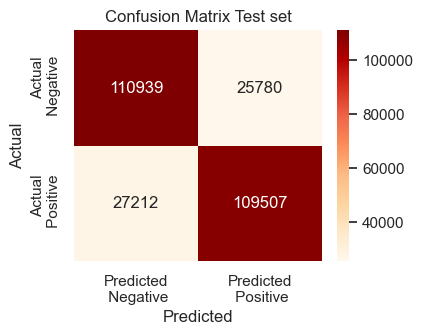

In [15]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd', 
            xticklabels=['Predicted\n Negative', 'Predicted\n Positive'], 
            yticklabels=['Actual\n Negative', 'Actual\n Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test set')
plt.show()

In [16]:
#Weight of the different features
for feature, weight in zip(X.columns, logreg_1.coef_[0]):
    print("{} has a weight of : {}".format(feature, weight))

instrumentalness has a weight of : -0.1484209625750683
liveness has a weight of : 0.03780542203201835
speechiness has a weight of : -0.08917838453141097
danceability has a weight of : -0.1763744496494322
valence has a weight of : 0.10473896629810657
loudness has a weight of : 0.038498410893815276
tempo has a weight of : 0.0769007192670347
acousticness has a weight of : 0.18597139280259528
energy has a weight of : -0.17586024153161237
mode has a weight of : 0.05057677819486877
key has a weight of : 0.012047270074905395
language_Dutch has a weight of : 2.676778117251428
language_English has a weight of : 8.95317769714827
language_French has a weight of : 3.1643335320358315
language_German has a weight of : 1.8228933598295884
language_Italian has a weight of : 1.3312859693768866
language_Japanese has a weight of : 6.273935649227663
language_Portuguese has a weight of : 1.8315294155280726
language_Spanish has a weight of : 4.298447240406162
tz_Africa has a weight of : 1.3417424655594052
tz

# Model 2: Classification by Decission tree

In [17]:
from time import time
t0 = time()

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 123)
dt_clf.fit(X_train_scaled, y_train_resampled)


t1 = time() - t0
print("Done in {} seconds".format(round(t1,3)))

Done in 6.744 seconds


In [18]:
# Predicting the target variable on the test set
y_pred = dt_clf.predict(X_test_scaled)

In [19]:
# Evaluating the model using classification report for imbalanced data
report = classification_report_imbalanced(y_test_resampled, y_pred)
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test_resampled, y_pred)
print('Accuracy:', accuracy)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.72      0.72      0.72      0.72      0.72      0.52    136719
          1       0.72      0.72      0.72      0.72      0.72      0.52    136719

avg / total       0.72      0.72      0.72      0.72      0.72      0.52    273438

Accuracy: 0.7203826827288087


In [20]:
pd.crosstab(y_test_resampled, y_pred, rownames=['Real Values'], colnames=['Predicted Values'])

Predicted Values      0      1
Real Values                   
0                 98279  38440
1                 38018  98701

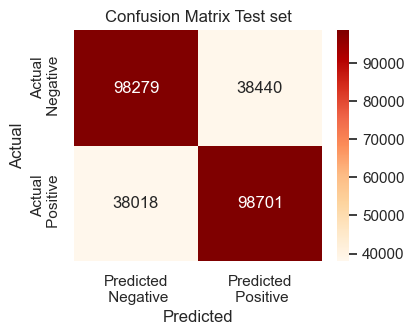

In [21]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd', 
            xticklabels=['Predicted\n Negative', 'Predicted\n Positive'], 
            yticklabels=['Actual\n Negative', 'Actual\n Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test set')
plt.show()

# Calculation of relevant values Decision Tree

In [22]:
#Importance of the features for the model
feats = {}
for feature, importance in zip(X.columns, dt_clf.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(12)

Importance
tz_Asia & Australia                   0.489802
instrumentalness                      0.186633
tz_North America                      0.172141
tz_Middle East                        0.068614
tz_Asia                               0.035814
language_Japanese                     0.028883
energy                                0.010956
speechiness                           0.004456
mode                                  0.002701
tz_North America & South America      0.000000
tz_North America & Central America    0.000000
tz_Europe                             0.000000

# Model 3: Classification by Random Forest

In [24]:
t0 = time()

from sklearn import ensemble

rf_clf= ensemble.RandomForestClassifier(n_jobs = -1,  random_state = 321)  #, random_state = 321
rf_clf.fit(X_train_scaled, y_train_resampled)

t1 = time() - t0
print("Done in {} seconds".format(round(t1,3)))

Done in 103.863 seconds


In [25]:
# Predicting the target variable on the test set
y_pred = rf_clf.predict(X_test_scaled)

In [26]:
# Evaluating the model using classification report for imbalanced data
report = classification_report_imbalanced(y_test_resampled, y_pred)
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test_resampled, y_pred)
print('Accuracy:', accuracy)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.86      0.95      0.90      0.91      0.82    136719
          1       0.87      0.95      0.86      0.91      0.91      0.83    136719

avg / total       0.91      0.91      0.91      0.91      0.91      0.82    273438

Accuracy: 0.9080010825123063


In [27]:
pd.crosstab(y_test_resampled, y_pred, rownames=['Real Values'], colnames=['Predicted Values'])

Predicted Values       0       1
Real Values                     
0                 118089   18630
1                   6526  130193

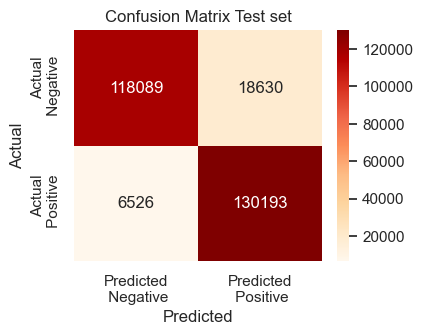

In [28]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd', 
            xticklabels=['Predicted\n Negative', 'Predicted\n Positive'], 
            yticklabels=['Actual\n Negative', 'Actual\n Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test set')
plt.show()

## Plot important features Decission Tree

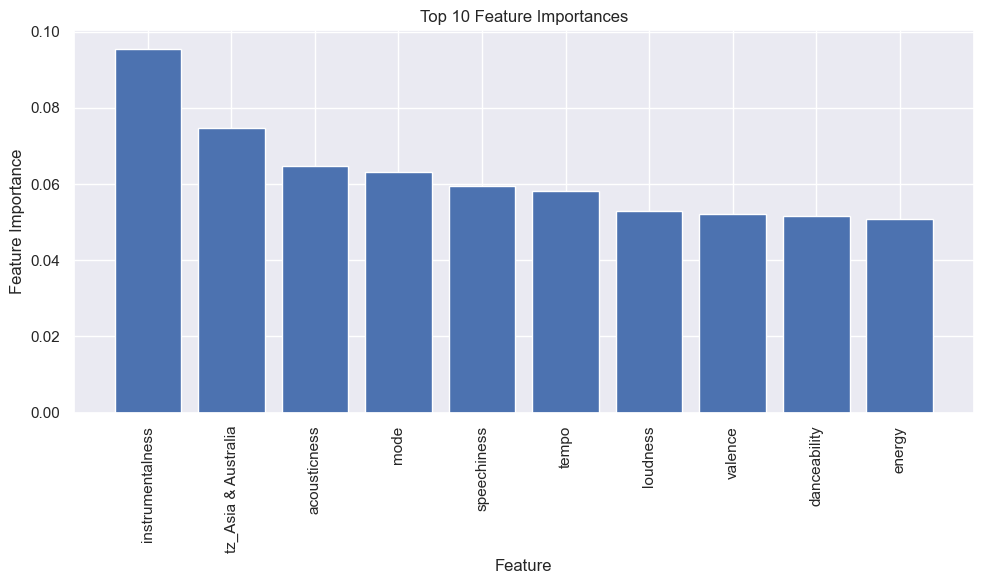

In [29]:
# Extracting column names
feature_names = X_train.columns.tolist()

# After training
feature_importances = rf_clf.feature_importances_


# Descending order
sorted_idx = feature_importances.argsort()[::-1]

# Number of features 
tops = 10  

# Plot the tops feature importances
plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importances".format(tops))
plt.bar(range(tops), feature_importances[sorted_idx][:tops], align="center")
plt.xticks(range(tops), [feature_names[i] for i in sorted_idx][:tops], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()


# Model 4: Classification by Boosting algorithms: AdaBoost

In [30]:
t0 = time()

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_scaled, y_train_resampled)

t1 = time() - t0
print("Done in {} seconds".format(round(t1,3)))

Done in 91.505 seconds


In [31]:
# Predicting the target variable on the train set
y_pred = adaboost_model.predict(X_test_scaled)

In [32]:
# Evaluating the model using classification report for imbalanced data
report = classification_report_imbalanced(y_test_resampled, y_pred)
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test_resampled, y_pred)
print('Accuracy:', accuracy)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.89      0.81      0.85      0.85      0.72    136719
          1       0.88      0.81      0.89      0.84      0.85      0.71    136719

avg / total       0.85      0.85      0.85      0.85      0.85      0.72    273438

Accuracy: 0.8474023361785853


In [33]:
pd.crosstab(y_test_resampled, y_pred, rownames=['Real Values'], colnames=['Predicted Values'])

Predicted Values       0       1
Real Values                     
0                 121116   15603
1                  26123  110596

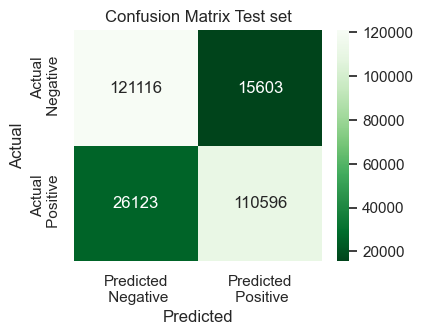

In [34]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens_r', 
            xticklabels=['Predicted\n Negative', 'Predicted\n Positive'], 
            yticklabels=['Actual\n Negative', 'Actual\n Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test set')
plt.show()

# Model 5: Classification by Bagging algorithm

In [35]:
t0 = time()

from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
bagging_model.fit(X_train_scaled, y_train_resampled)

t1 = time() - t0
print("Done in {} seconds".format(round(t1,3)))

Done in 161.852 seconds


In [36]:
# Predicting the target variable on the train set
y_pred = bagging_model.predict(X_test_scaled)

In [37]:
# Evaluating the model using classification report for imbalanced data
report = classification_report_imbalanced(y_test_resampled, y_pred)
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test_resampled, y_pred)
print('Accuracy:', accuracy)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.86      0.94      0.90      0.90      0.80    136719
          1       0.87      0.94      0.86      0.90      0.90      0.82    136719

avg / total       0.90      0.90      0.90      0.90      0.90      0.81    273438

Accuracy: 0.9007087529897089


In [38]:
pd.crosstab(y_test_resampled, y_pred, rownames=['Real Values'], colnames=['Predicted Values'])

Predicted Values       0       1
Real Values                     
0                 117974   18745
1                   8405  128314

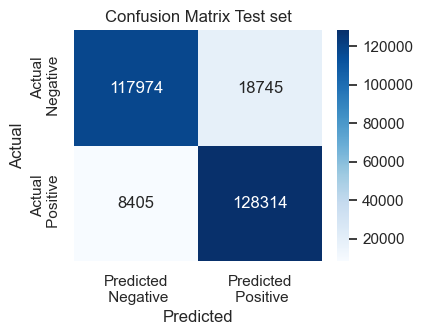

In [39]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted\n Negative', 'Predicted\n Positive'], 
            yticklabels=['Actual\n Negative', 'Actual\n Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test set')
plt.show()

## Plot most important features Bagging Algorithm

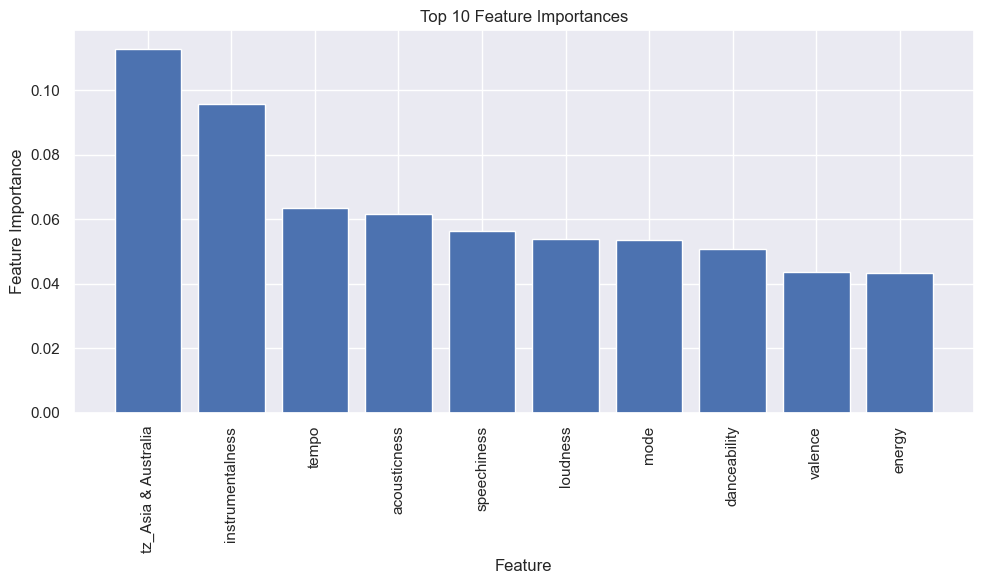

In [40]:
# Calculate feature importances 
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)

# descending order
sorted_idx = feature_importances.argsort()[::-1]

# Number of features to display
tops = 10 

# Plot the top N feature importances
plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importances".format(tops))
plt.bar(range(tops), feature_importances[sorted_idx][:tops], align="center")
plt.xticks(range(tops), [feature_names[i] for i in sorted_idx][:tops], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()


# Model 6: Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators = 10, learning_rate = 0.1, max_depth = 3)
gbm.fit(X_train_scaled, y_train_resampled)

GradientBoostingClassifier(n_estimators=10)

In [42]:
y_pred = gbm.predict(X_test_scaled)

In [43]:
# Evaluating the model using classification report for imbalanced data
report = classification_report_imbalanced(y_test_resampled, y_pred)
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test_resampled, y_pred)
print('Accuracy:', accuracy)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.73      0.84      0.69      0.78      0.76      0.59    136719
          1       0.81      0.69      0.84      0.75      0.76      0.57    136719

avg / total       0.77      0.77      0.77      0.77      0.76      0.58    273438

Accuracy: 0.766433341379033


# Most important features Gradient Boosting

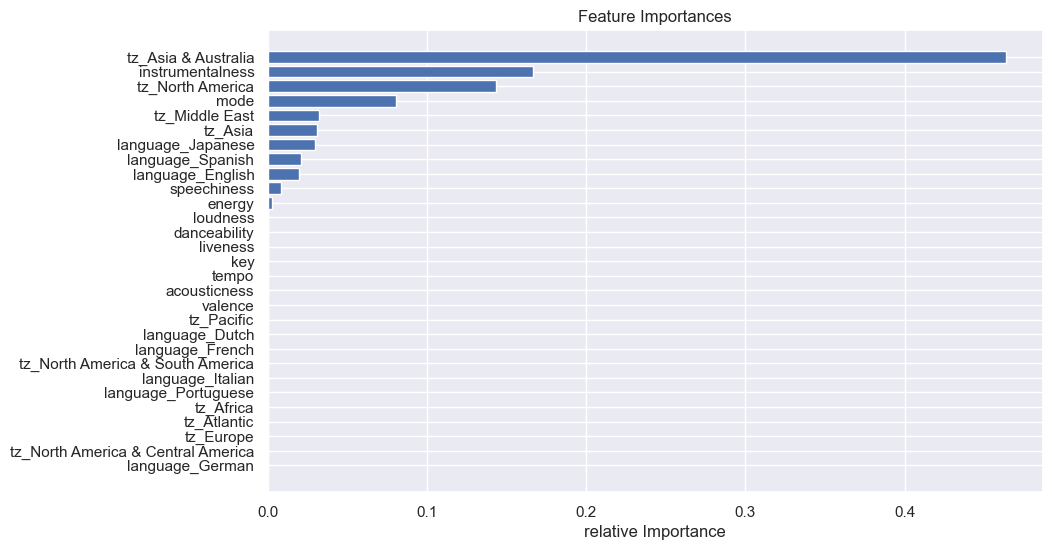

In [44]:
#Features selection

importances = gbm.feature_importances_
features = X.columns
indices = np.argsort(importances)



# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')


plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel( 'relative Importance')
plt.show()

# Model 7: Random Forest GridSearchCV

In [ ]:
#Random Forest classifier

t0 = time()

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

print(cross_val_score(rf, X_train_scaled, y_train_resampled).mean())

t1 = time() - t0
print("Done in {} seconds".format(round(t1,2)))


#0.9510105862994858
#Done in 677.6 seconds


## Time = 677.6sec

In [ ]:
# Initialize the parameters
params = {
            'max_features': ["sqrt", "log2"],   #, None
            'min_samples_split': [i for i in range (4,5)]
          }

In [ ]:
#Calculation of GridSearchCV

t0 = time()

from sklearn.model_selection import GridSearchCV

grid_rf = GridSearchCV(rf, params)
grid_rf.fit(X_train_scaled, y_train_resampled)
scores = cross_val_score(rf, X_train_scaled, y_train_resampled)

t1 = time() - t0
print("Done in {} seconds".format(round(t1,2)))

#Done in 2109.49 seconds


## Time = 2109.49.sec

In [ ]:
#Print the best parameters
print(grid_rf.best_params_)

#{'max_features': 'log2', 'min_samples_split': 4}

## **_Best parameters Random Forest: max_features': 'log2', 'min_samples_split': 4_**


In [45]:
#Recalculating with the new parameters

t0 = time()

from sklearn import ensemble

rf_clf_2= ensemble.RandomForestClassifier(n_jobs = -1, max_features = 'log2', min_samples_split = 4,  random_state = 321)  #, random_state = 321
rf_clf_2.fit(X_train_scaled, y_train_resampled)

t1 = time() - t0
print("Done in {} seconds".format(round(t1,3)))

Done in 169.589 seconds


In [46]:
# Predicting the target variable on the train set
y_pred = rf_clf_2.predict(X_test_scaled)

In [47]:
# Evaluating the model using classification report for imbalanced data
report = classification_report_imbalanced(y_test_resampled, y_pred)
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test_resampled, y_pred)
print('Accuracy:', accuracy)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.86      0.95      0.90      0.91      0.81    136719
          1       0.87      0.95      0.86      0.91      0.91      0.83    136719

avg / total       0.91      0.91      0.91      0.91      0.91      0.82    273438

Accuracy: 0.9077816543421178


In [48]:
pd.crosstab(y_test_resampled, y_pred, rownames=['Real Values'], colnames=['Predicted Values'])

Predicted Values       0       1
Real Values                     
0                 117955   18764
1                   6452  130267

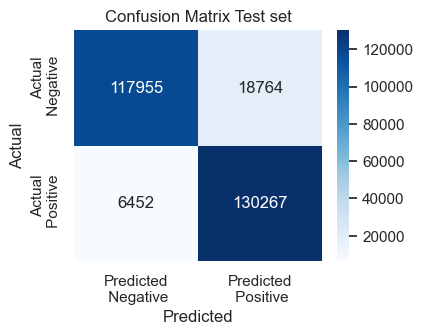

In [49]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted\n Negative', 'Predicted\n Positive'], 
            yticklabels=['Actual\n Negative', 'Actual\n Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test set')
plt.show()

## Most important features Radom Forest Grid Search

In [50]:
#Most important features

feats = {}
for feature, importance in zip(X.columns, rf_clf_2.feature_importances_):   #dt_clf
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(10)

Importance
instrumentalness       0.096635
tz_Asia & Australia    0.070202
mode                   0.066679
acousticness           0.064081
speechiness            0.059938
tempo                  0.057703
language_Japanese      0.053397
loudness               0.053047
valence                0.052822
energy                 0.052222

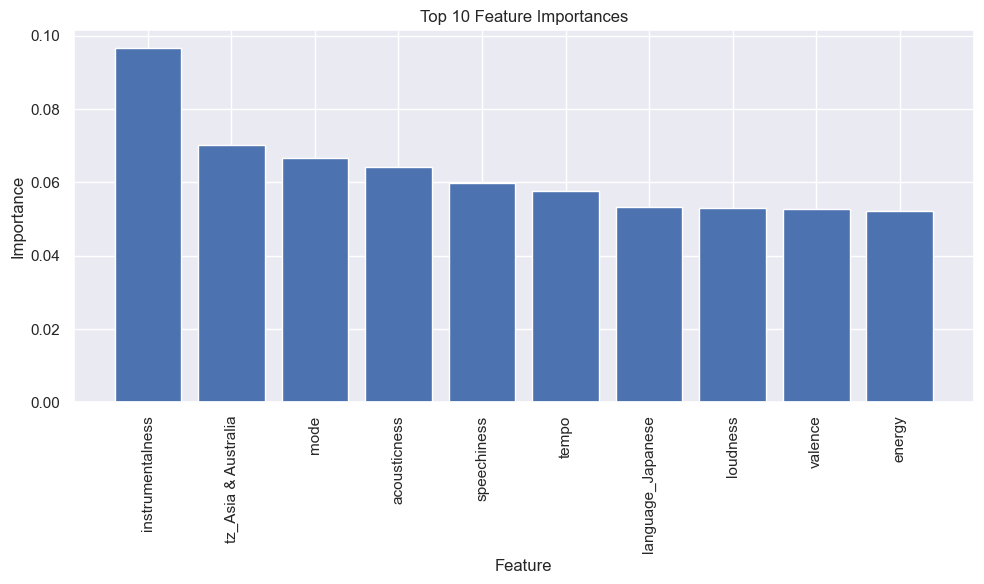

In [51]:
#Features plot

feats = {}
for feature, importance in zip(X.columns, rf_clf_2.feature_importances_):   
    feats[feature] = importance 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances_sorted = importances.sort_values(by='Importance', ascending=False).head(10)


#Plot
plt.figure(figsize=(10, 6))
plt.bar(importances_sorted.index, importances_sorted['Importance'])
plt.title("Top 10 Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Model 8: Deep Learning for tabular data

In [179]:
# Import the libraries

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import callbacks

In [180]:
# Define the input shape
input_shape = X_train.shape[1]

# Create the model
model = Sequential([
    Dense(128, input_shape=(input_shape,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

In [181]:
# Define callbacks

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    mode='min',
    restore_best_weights=True
)

lr_plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    factor=0.8,
    verbose=2,
    mode='min'
)

In [182]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [183]:
#Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 2)                 2

In [184]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train_resampled,
    epochs=50,  # Adjustable
    batch_size=64,  # Adjustable
    validation_split=0.2,
    callbacks=[early_stopping, lr_plateau]
)

Epoch 1/50
13672/13672 [==============================] - 56s 4ms/step - loss: 0.3347 - accuracy: 0.8449 - val_loss: 0.3796 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 2/50
13672/13672 [==============================] - 72s 5ms/step - loss: 0.3091 - accuracy: 0.8597 - val_loss: 0.3923 - val_accuracy: 0.7771 - lr: 0.0010
Epoch 3/50
13672/13672 [==============================] - 79s 6ms/step - loss: 0.2984 - accuracy: 0.8655 - val_loss: 0.4582 - val_accuracy: 0.7488 - lr: 0.0010
Epoch 4/50
13672/13672 [==============================] - 117s 9ms/step - loss: 0.2892 - accuracy: 0.8697 - val_loss: 0.3310 - val_accuracy: 0.8476 - lr: 0.0010
Epoch 5/50
13672/13672 [==============================] - 108s 8ms/step - loss: 0.2813 - accuracy: 0.8744 - val_loss: 0.3805 - val_accuracy: 0.7930 - lr: 0.0010
Epoch 6/50
13672/13672 [==============================] - 90s 7ms/step - loss: 0.2731 - accuracy: 0.8784 - val_loss: 0.3496 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 7/50
13672/13672 [==============

In [185]:
# Evaluate the model on the test data
evaluation = model.evaluate(X_test_scaled, y_test_resampled)

# Loss and accuracy evaluation
loss = evaluation[0]
accuracy = evaluation[1]

# Print the evaluation results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


8545/8545 [==============================] - 13s 2ms/step - loss: 0.9455 - accuracy: 0.8890
Test Loss: 0.9455
Test Accuracy: 88.90%


# Plots evaluation of the model train and test

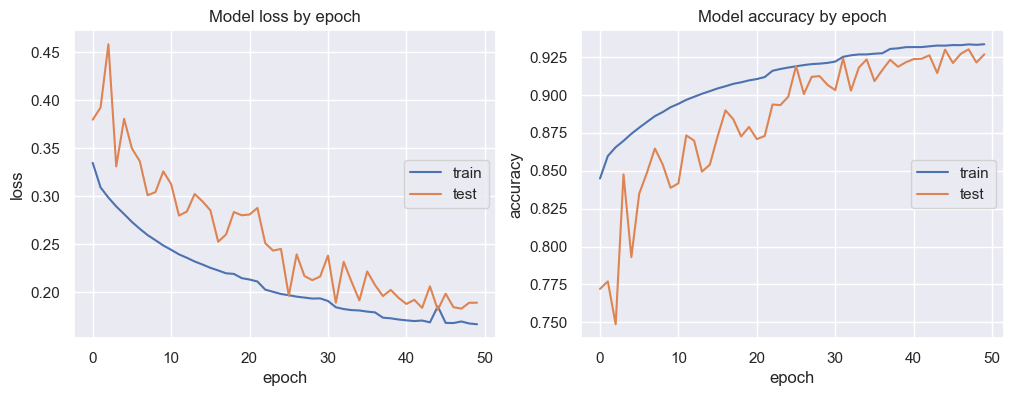

In [186]:
#Plot definitions for loss and accuracy

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right');

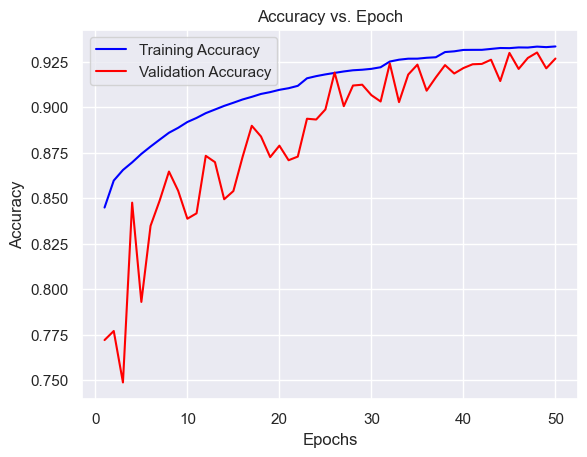

In [187]:
# Labels 

plt.title('Accuracy vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Accuracy curve on training sample
plt.plot(np.arange(1 , 51, 1),
         history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Test Sample accuracy curve
plt.plot(np.arange(1 , 51, 1),
         history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')


plt.legend()


plt.show()

In [188]:
y_prob_test = model.predict(X_test_scaled)
y_pred_test = y_prob_test.argmax(axis=-1)

8545/8545 [==============================] - 13s 1ms/step


In [189]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_resampled,y_pred_test))
#print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88    136719
           1       0.85      0.94      0.89    136719

    accuracy                           0.89    273438
   macro avg       0.89      0.89      0.89    273438
weighted avg       0.89      0.89      0.89    273438



In [190]:
pd.crosstab(y_test_resampled, y_pred_test, rownames = ['Real'], colnames = ['Prediction'])

Prediction       0       1
Real                      
0           114917   21802
1             8554  128165

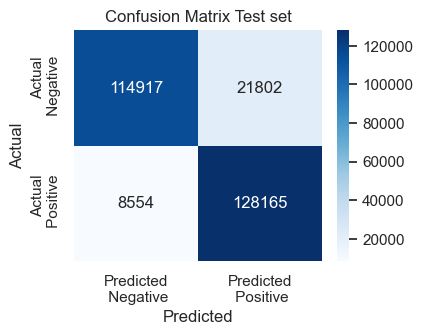

In [191]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test_resampled, y_pred_test)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted\n Negative', 'Predicted\n Positive'], 
            yticklabels=['Actual\n Negative', 'Actual\n Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test set')
plt.show()

# <center> Music Recommendation
# <center> Analysis Part IV 

# Interpretability using SHAP

In [12]:
import xgboost as xgb

import shap
shap.initjs()

In [18]:
t0 = time()

#Train model
model = xgb.XGBClassifier(n_estimators=200, max_depth=5, random_state= 42) 
model.fit(X_train_scaled, y_train_resampled)

t1 = time() - t0
print("Done in {} seconds".format(round(t1,2)))

Done in 184.09 seconds


In [19]:
# Predicting the target variable on the train set
y_pred_esp = model.predict(X_test_scaled)

In [20]:
# Evaluating the model using classification report for imbalanced data
report = classification_report_imbalanced(y_test_resampled, y_pred_esp)
print(report)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.93      0.94      0.93      0.93      0.87    136719
          1       0.93      0.94      0.93      0.94      0.93      0.88    136719

avg / total       0.93      0.93      0.93      0.93      0.93      0.87    273438



In [33]:
t0 = time()

#Original feature names from the splitting of final merge into X and y
original_feature_names = X.columns

#Get shap values
explainer = shap.Explainer(model, X_train_scaled, feature_names=original_feature_names)
shap_values = explainer(X_test_scaled)

print(np.shape(shap_values))    #(273438, 29)  

t1 = time() - t0
print("Done in {} seconds".format(round(t1,2)))  #Done in 1319.98 seconds




100%|===================| 273234/273438 [21:58<00:00]        

(273438, 29)
Done in 1319.98 seconds


# Waterfall Plot

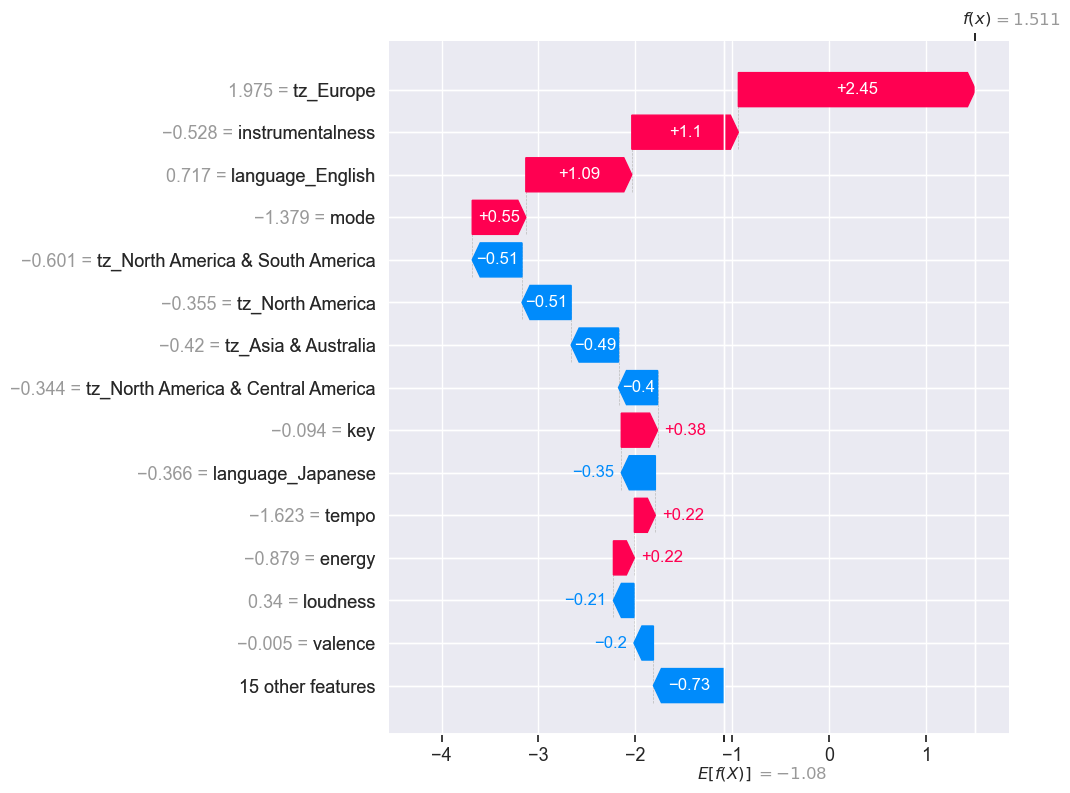

In [34]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0], max_display=15)

# Plot 2: Force Plot

In [35]:
# Forceplot for first observation
shap.plots.force(shap_values[0])

# Plot 3: Stacked force plot

In [36]:
shap.plots.force(shap_values[0:100])

# Plot 4: Mean |SHAP value|

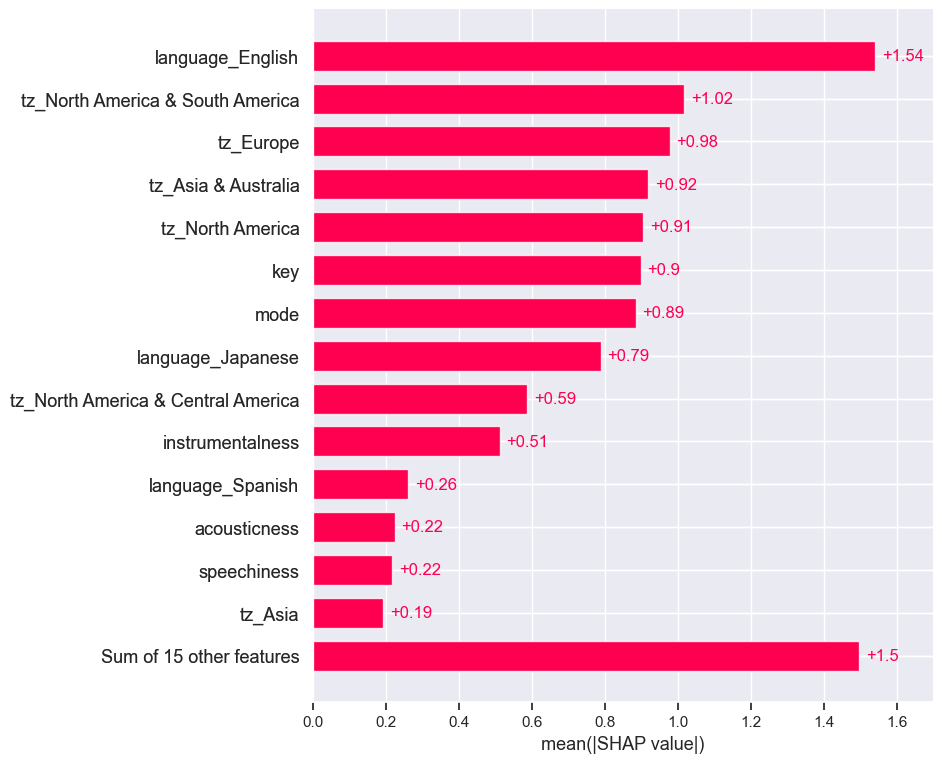

In [37]:
#Mean SHAP
shap.plots.bar(shap_values, max_display=15)

# Plot 5: Beeswarm

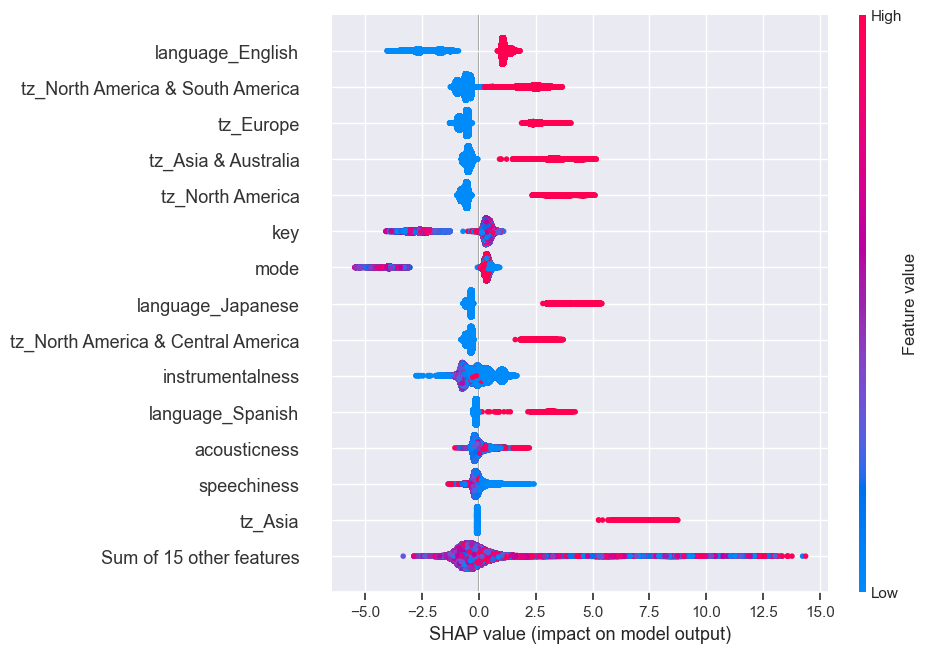

In [38]:
# Beeswarm plot
shap.plots.beeswarm(shap_values, max_display=15)

## **_The results of SHAP are very dependant on the model and may not be as acurate as the features presented by the other ML Models. The trend shows that Time Zones and languages have a huge impact on calculation. Even more than the musical characteristics. However as stated before, the features of the models seem more realiable. Even though some of the time zones play a huge role_**